<a href="https://colab.research.google.com/github/hamant-jagwan/Cardiovascular_Risk_Prediction--ML--Classification/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Project Title : Cardiovascular Risk Prediction**


**Project type** - Classification

**Contribution** - Individual

**Index:**
1. Problem statement
2. Importing the libraries and the dataset
3. Understand the data
4. Data cleaning
5. Handling missing data
6. Exploratory data analysis
7. Feature selection
8. Data preprocessing
9. ML model implementation
10. Results
11. Summary and conclusions


# **1. Problem Statement:**

* Cardiovascular diseases (CVDs) are the major cause of mortality worldwide. According to WHO, 17.9 million people died from CVDs in 2019, accounting for 32% of all global fatalities.
* Though CVDs cannot be treated, predicting the risk of the disease and taking the necessary precautions and medications can help to avoid severe symptoms and, in some cases, even death.
* As a result, it is critical that we accurately predict the risk of heart disease in order to avert as many fatalities as possible.

# **2. Importing the libraries and the dataset:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
# Load Dataset
data = 'https://raw.githubusercontent.com/hamant-jagwan/Cardiovascular_Risk_Prediction--ML--Classification/main/Cardiovascular_Risk_Prediction.csv'
cardio_df = pd.read_csv(data,index_col='id', encoding= 'ISO-8859-1')

# **3. Understand the Data:**

In [3]:
# First 5 rows of the dataset
cardio_df.head()


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# Dataset Rows & Columns
cardio_df.shape

(3390, 16)

In [5]:
# Dataset Info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


## **3.1. Variable Description:**

**Demographic:**
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target):**
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [6]:
# checking duplicates
len(cardio_df[cardio_df.duplicated()])

0

In [7]:
# checking null values
null_count = cardio_df.isna().sum()
null_count.sum()


510

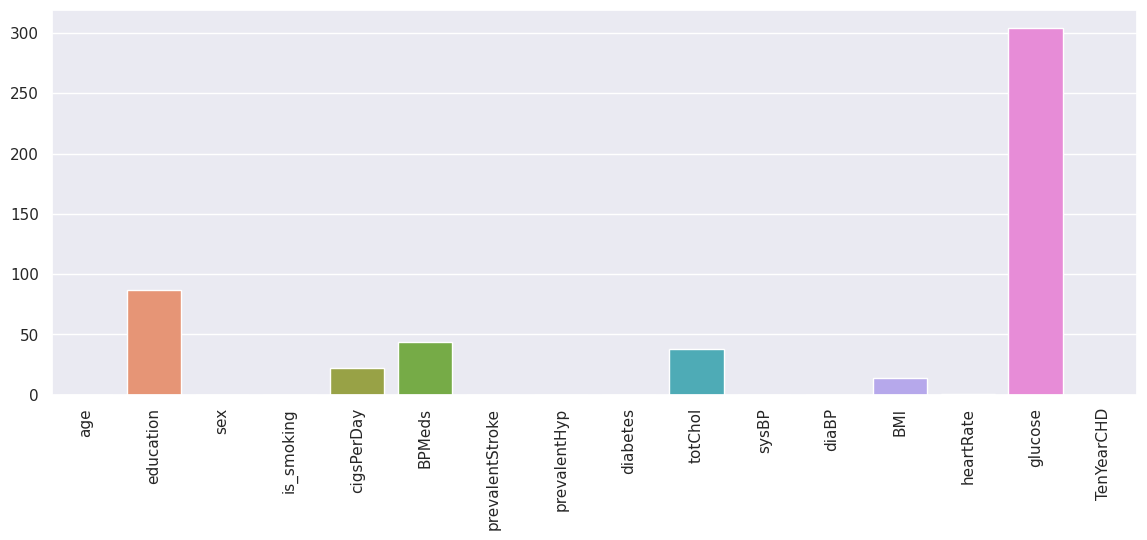

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize = (14,5))
sns.barplot(x = null_count.index, y = null_count.values )
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
# Display the plot
plt.show()



* The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).
* The dataset provides the patients’ information. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.
* **The dataset contains 3390 rows and 16 columns. There are no duplicate records, and contains 510 missing values.**

# **4. Data Cleaning:**

In [9]:
# Dataset Columns
cardio_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Dataset Describe
cardio_df.describe(include = 'all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [11]:
# Renaming the columns
cardio_df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [12]:
# Check Unique Value for each feature
for i in cardio_df.columns:
  print("Unique value in",i,":", cardio_df[i].nunique())


Unique value in age : 39
Unique value in education : 4
Unique value in sex : 2
Unique value in is_smoking : 2
Unique value in cigs_per_day : 32
Unique value in bp_meds : 2
Unique value in prevalent_stroke : 2
Unique value in prevalent_hyp : 2
Unique value in diabetes : 2
Unique value in total_cholesterol : 240
Unique value in systolic_bp : 226
Unique value in diastolic_bp : 142
Unique value in bmi : 1259
Unique value in heart_rate : 68
Unique value in glucose : 132
Unique value in ten_year_chd : 2


In [13]:
# Defining 3 lists containing the column names of
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [14]:
# Encoding the binary columns

cardio_df['sex'] = np.where(cardio_df['sex'] == 'M',1,0)
cardio_df['is_smoking'] = np.where(cardio_df['is_smoking'] == 'YES',1,0)

In [15]:
print(cardio_df['sex'].value_counts())
print(cardio_df['is_smoking'].value_counts())

0    1923
1    1467
Name: sex, dtype: int64
0    1703
1    1687
Name: is_smoking, dtype: int64


# **5. Handling missing data:**

In [16]:
# checking for null values
cardio_df.isna().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

In [17]:
# total null values
cardio_df.isna().sum().sum()

510

**There are a total of 510 missing values in the dataset.**

## **5.1. Replacing the missing values in the categorical columns with the most frequent entry:**

In [18]:
# Replacing the missing values in the categorical columns with its mode
cardio_df['education'] = cardio_df['education'].fillna(cardio_df['education'].mode()[0])
cardio_df['bp_meds'] = cardio_df['bp_meds'].fillna(cardio_df['bp_meds'].mode()[0])

In [19]:

# education distribution after mode imputation
cardio_df['education'].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [20]:
# bp_meds distribution after mode imputation
cardio_df['bp_meds'].value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

## **5.2. cigs_per_day:**

In [21]:
# Mean and median number of cigarettes per day
print(cardio_df.cigs_per_day.mean().round(0))
print(cardio_df.cigs_per_day.median())

9.0
0.0


In [22]:
# All missing values in the cigs_per_day column
cardio_df[cardio_df['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0


**From the above table, we find that for every instance of missing values in cigs per day, the patients reported that they smoke.**

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [23]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
print(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].mean().round(3))
print(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].median())

18.346
20.0


* Mean number of cigarettes for a smoker = 18.34
* Median number of cigarettes for a smoker = 20

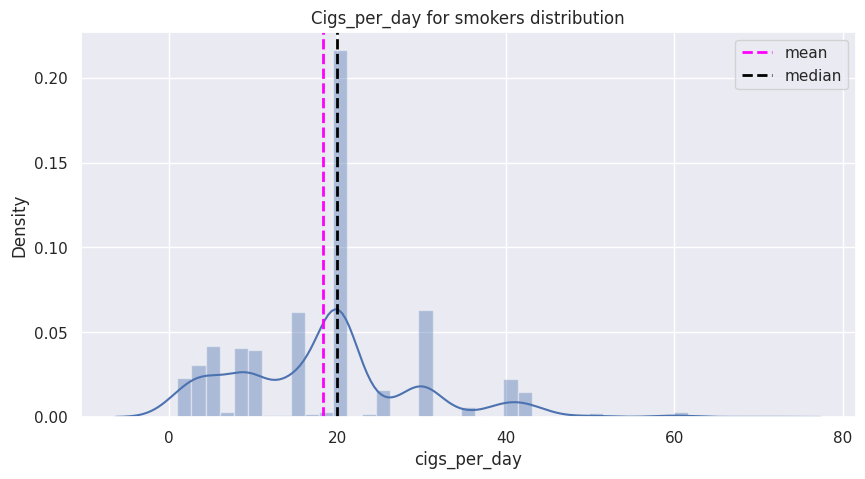

In [24]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'])
plt.axvline(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].median(), color='black', linestyle='dashed', linewidth=2, label= 'median')
plt.title('Cigs_per_day for smokers distribution')
plt.legend()
plt.show()

<Axes: >

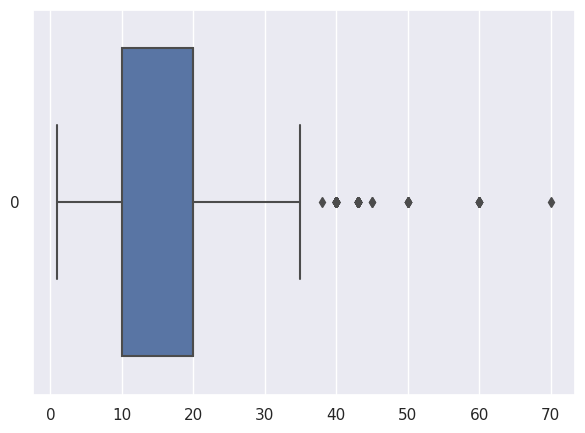

In [25]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(7,5))
sns.boxplot(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'], orient =  "h")

**Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.**

In [26]:
# Imputing the missing values in the cigs_per_day
cardio_df['cigs_per_day'] = cardio_df['cigs_per_day'].fillna(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].median())

In [27]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

cardio_df[(cardio_df['is_smoking']==0) & (cardio_df['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [28]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

cardio_df[(cardio_df['is_smoking']==1) & (cardio_df['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


**There are no errors in these columns.**

## **5.3. total_cholestrol, bmi, heart_rate:**

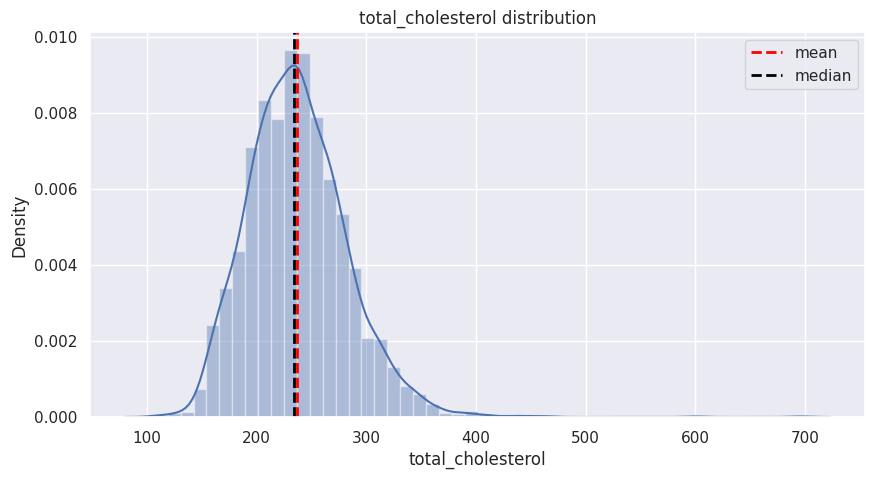

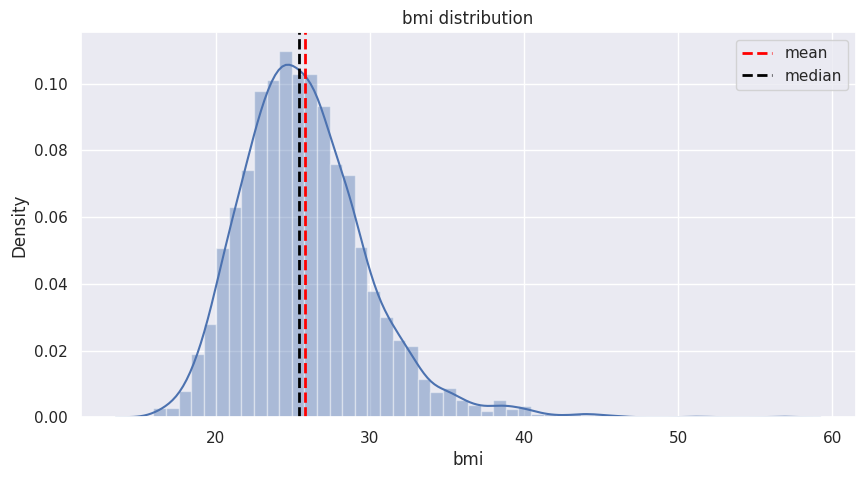

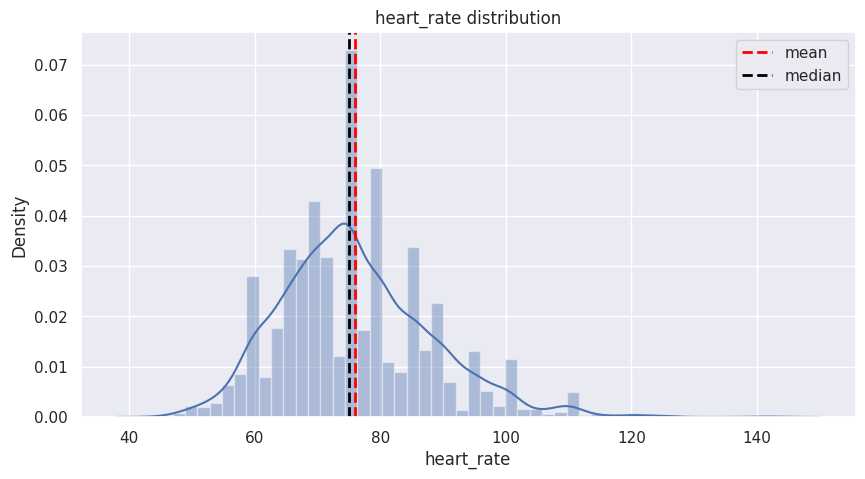

In [29]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['total_cholesterol', 'bmi', 'heart_rate']:
  plt.figure(figsize = (10,5))
  sns.distplot(cardio_df[i])
  plt.axvline(cardio_df[i].mean(), color = 'Red', linestyle = 'dashed', linewidth= 2,label = 'mean')
  plt.axvline(cardio_df[i].median(), color = 'black', linestyle = 'dashed', linewidth= 2, label = 'median')
  plt.legend()
  plt.title(i + ' distribution')
  plt.show()

**The total_cholestrol, bmi, and heart_rate columns are positively skewed**

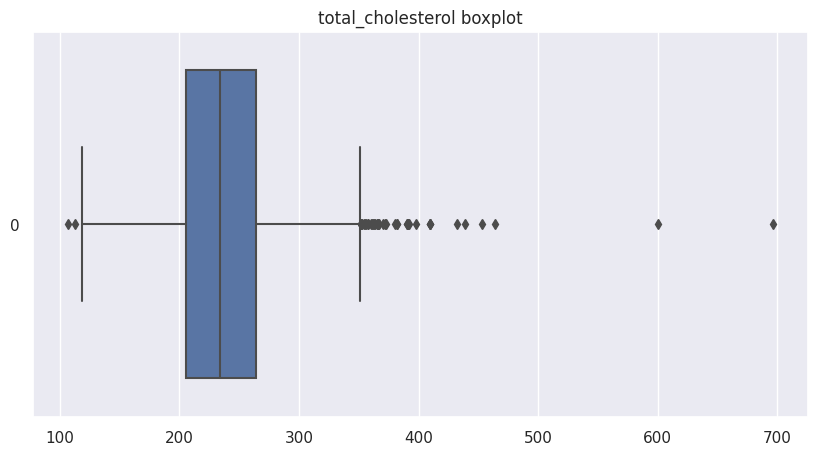

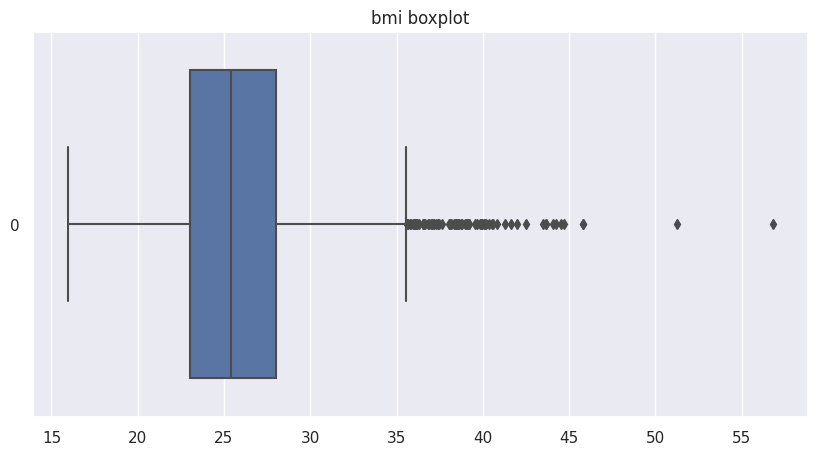

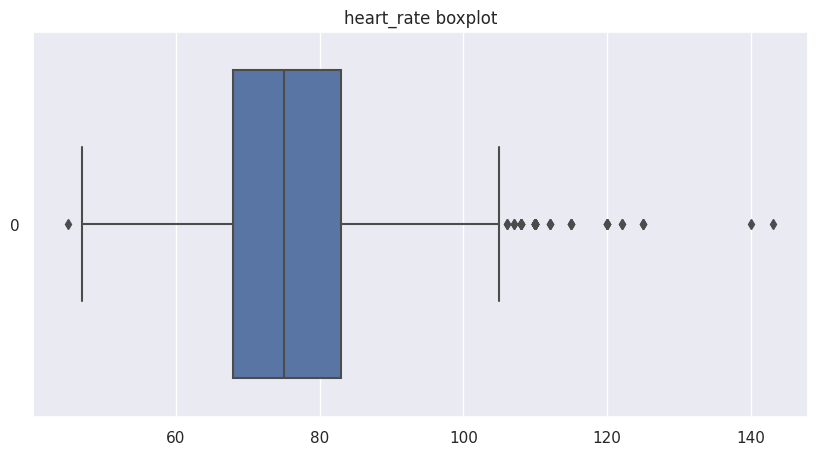

In [30]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(cardio_df[i], orient = 'h')
  plt.title(i+' boxplot')
  plt.show()

**The total_cholestrol, bmi, and heart_rate columns contain outliers.**

**Since the total_cholestrol, bmi, and heart_rate columns are positively skewed, and also contains outliers. We can impute the missing values with its median.**


In [31]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
cardio_df['total_cholesterol'] = cardio_df['total_cholesterol'].fillna(cardio_df['total_cholesterol'].median())
cardio_df['bmi'] = cardio_df['bmi'].fillna(cardio_df['bmi'].median())
cardio_df['heart_rate'] = cardio_df['heart_rate'].fillna(cardio_df['heart_rate'].median())

## **5.4. glucose:**

**The glucose column contains 304 missing values.**

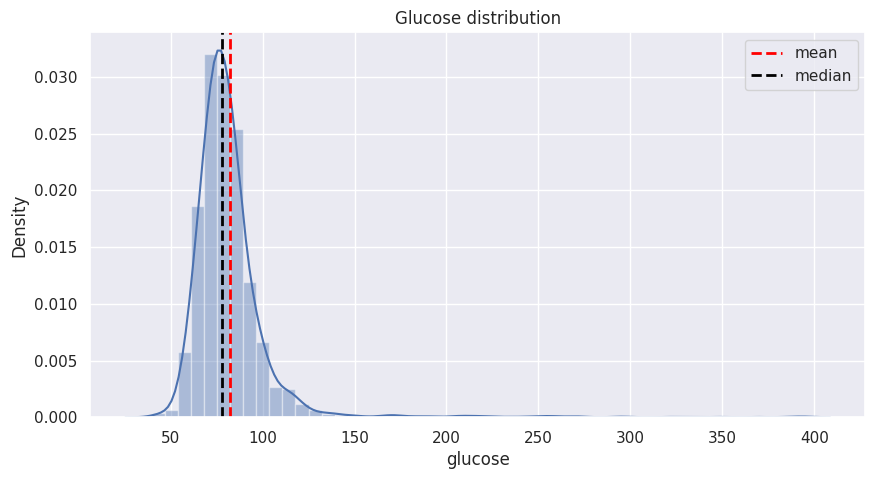

In [32]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(cardio_df['glucose'])
plt.axvline(cardio_df['glucose'].mean(), color='red', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(cardio_df['glucose'].median(), color='black', linestyle='dashed', linewidth=2 , label = 'median')
plt.title('Glucose distribution')
plt.legend()
plt.show()

**The glucose column is positively skewed.**

Text(0.5, 1.0, 'Glucose boxplot')

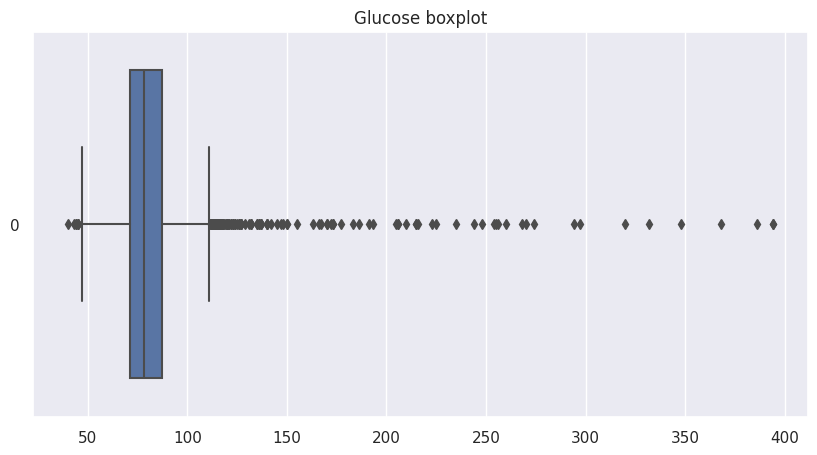

In [33]:
# Outliers in glucose
plt.figure(figsize=(10,5))
sns.boxplot(cardio_df['glucose'], orient= 'h')
plt.title('Glucose boxplot')

**The glucose column contains outliers.**

In [34]:
# Mean, median, and mode for glucose
cardio_df.glucose.mean(), cardio_df.glucose.median(), cardio_df.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

* The distribution is positively skewed, with outliers.(mean> median> mode)
* There are **304** missing values in the glucose column. **If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.**
* **To avoid this we can impute the missing values using KNN imputer.**
* If the dataset in question had been a time series, we could have used the interpolation method to impute the missing values.

In [35]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(cardio_df)
cardio_df = pd.DataFrame(imputed, columns=cardio_df.columns)

In [36]:
# mean, median, and mode for glucose after knn imputation
cardio_df.glucose.mean(), cardio_df.glucose.median(), cardio_df.glucose.mode()

(82.04327433628319,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

**After KNN imputation, there is no massive change in the values of mean. And the values of median and mode remain the same.**

In [37]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column.

In [38]:
# changing datatypes
cardio_df = cardio_df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [39]:
# checking for missing values
cardio_df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

**We have successfully handled all the missing values in the dataset.**

# **6. Exploratory Data Analysis:**

## **6.1. Distribution of the dependent variable:**

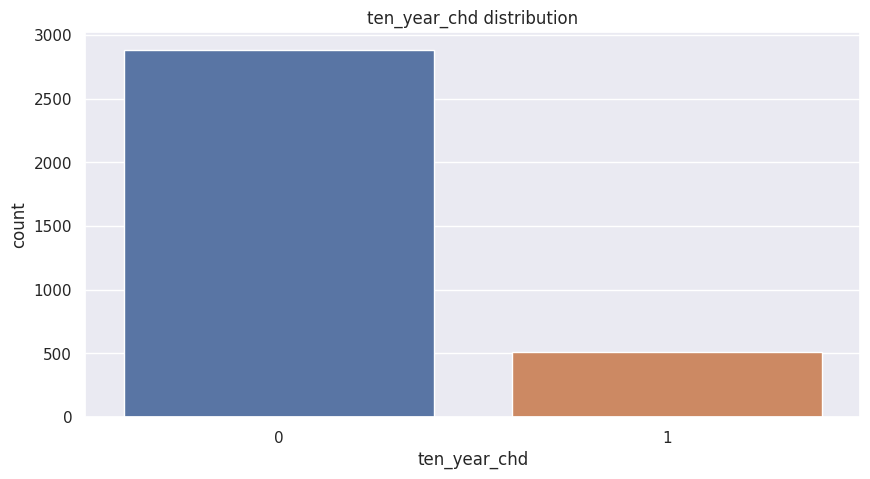

In [40]:
# Distribution of dependent varaible - ten_year_chd
dependent_var= ['ten_year_chd']
plt.figure(figsize=(10,5))
sns.countplot(data=cardio_df, x='ten_year_chd')
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')
plt.show()

**The dependent variable - 10 year risk of CHD is unbalanced.**

In [41]:
# Distribution of dependent variable
cardio_df.ten_year_chd.value_counts()

0    2879
1     511
Name: ten_year_chd, dtype: int64

In [42]:
# unbalanced distribution
511/(2879+511)*100

15.073746312684367

The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

## **6.2. Analyzing the distribution of the continuous independent variables:**


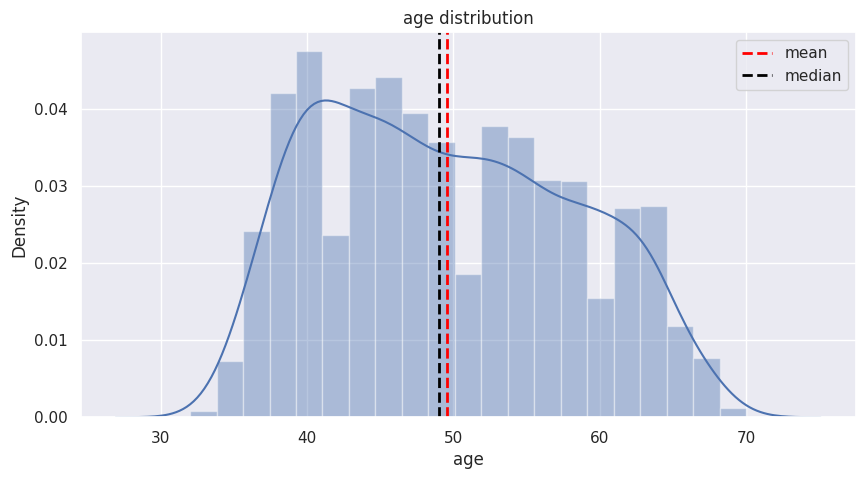

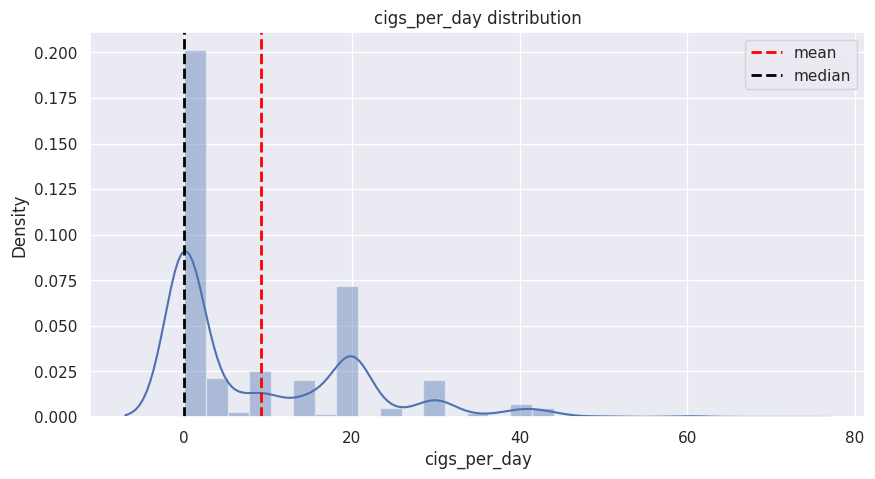

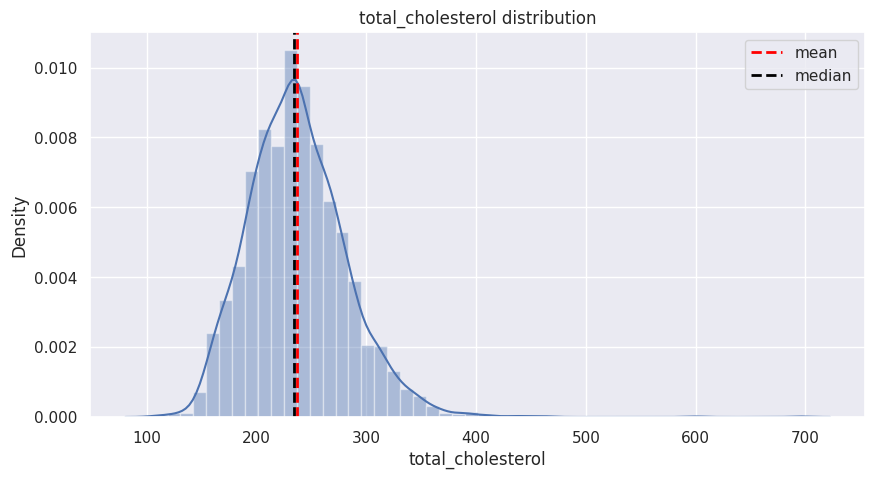

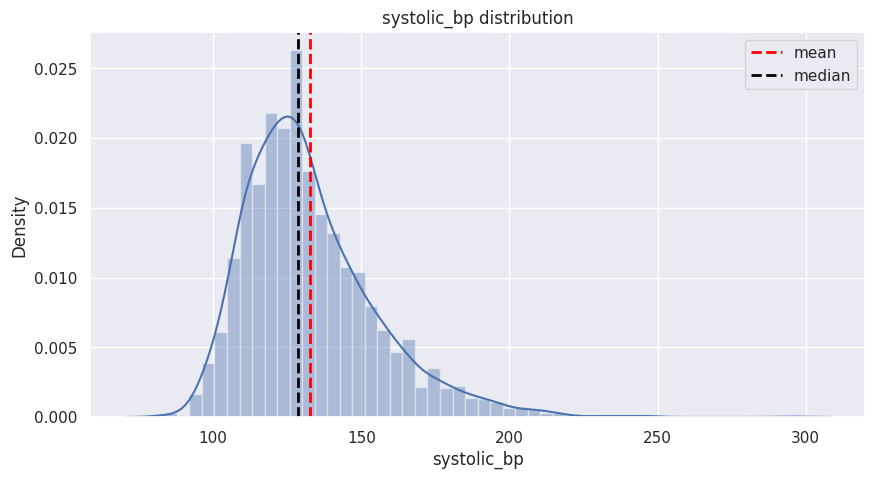

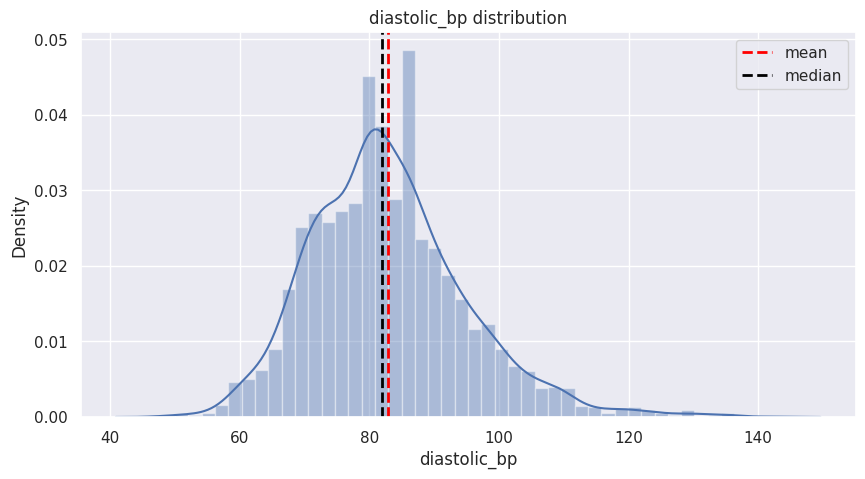

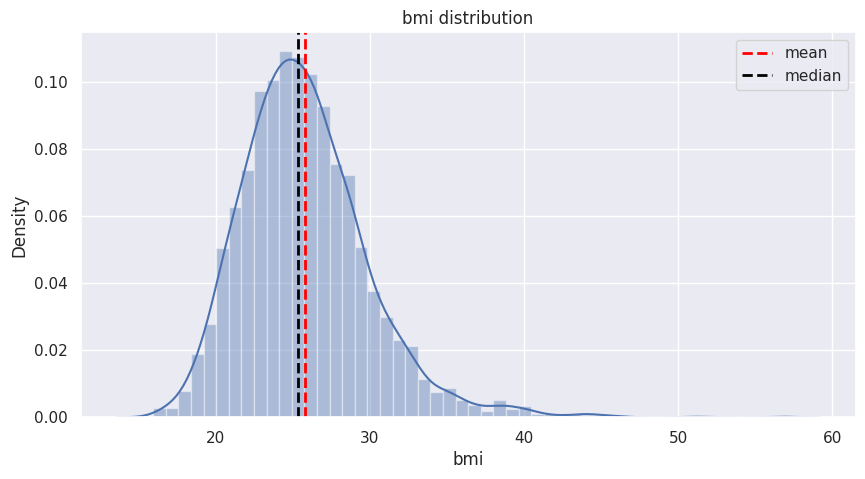

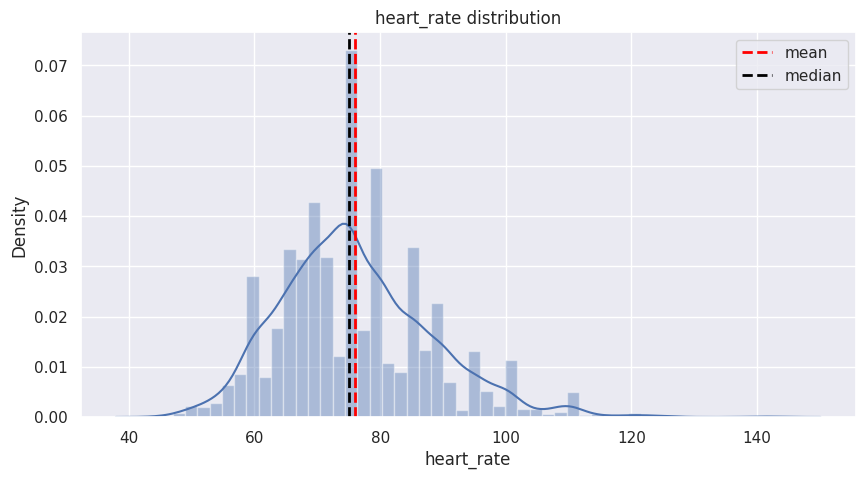

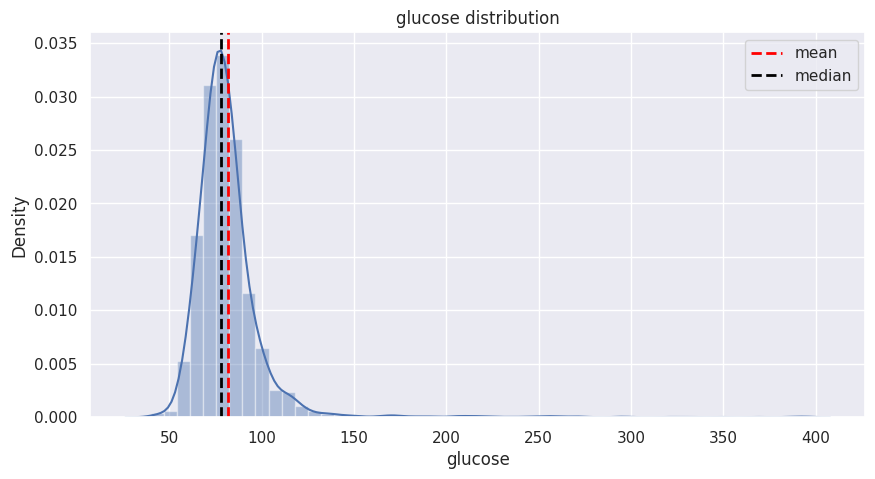

In [43]:
# Analysing the distribution of continuous variables in the dataset
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(cardio_df[col])
  plt.axvline(cardio_df[col].mean(), color='red', linestyle='dashed', linewidth=2 , label = 'mean')
  plt.axvline(cardio_df[col].median(), color='black', linestyle='dashed', linewidth=2 , label = 'median')
  plt.title(col+' distribution')
  plt.legend()
  plt.show()

**The distribution of several features is skewed, and contains outliers. We'll deal with the skew afterwards.**

## **6.3. Analyzing the distribution of the discrete independent variables:**

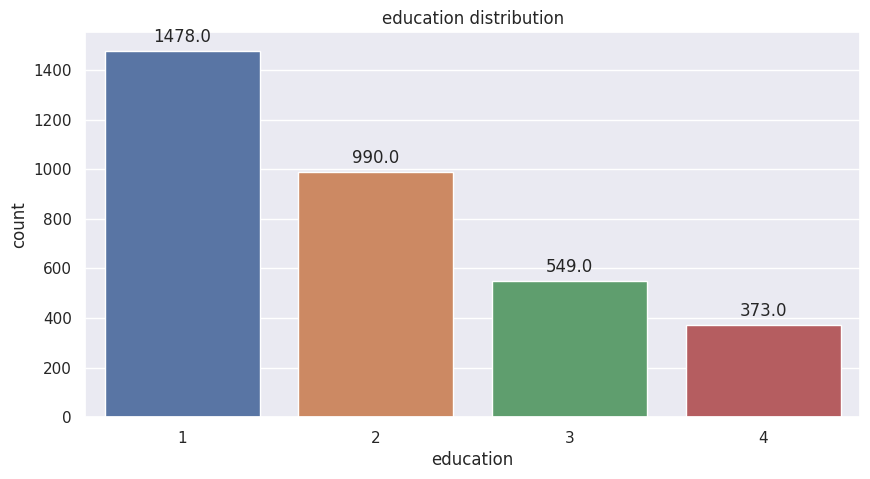

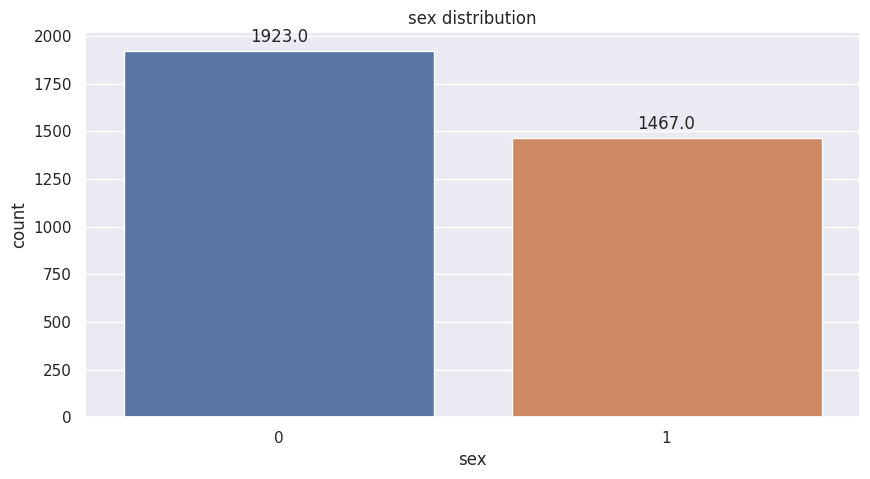

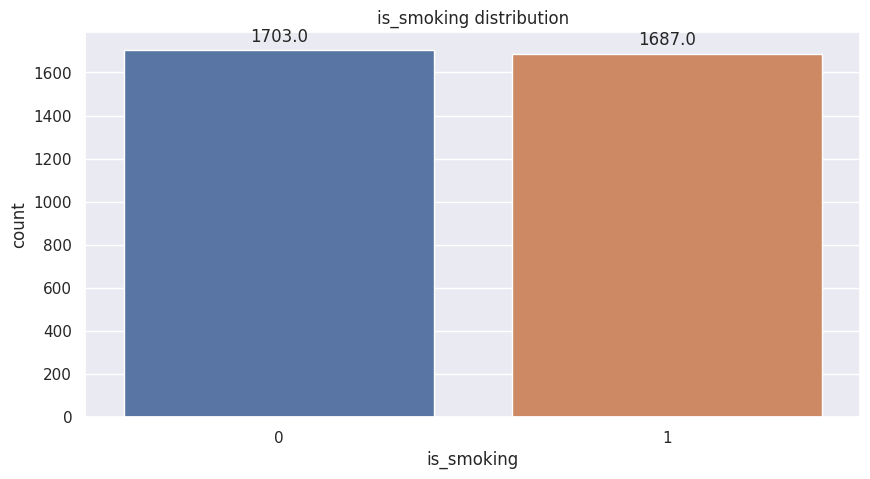

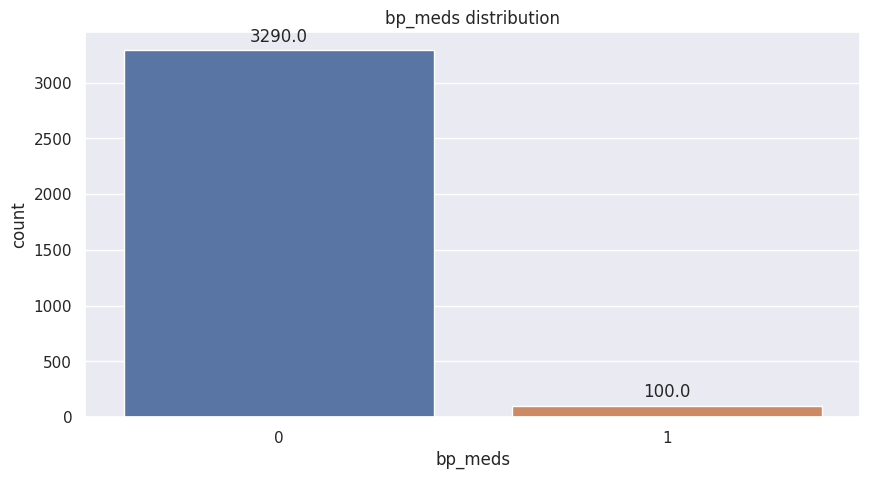

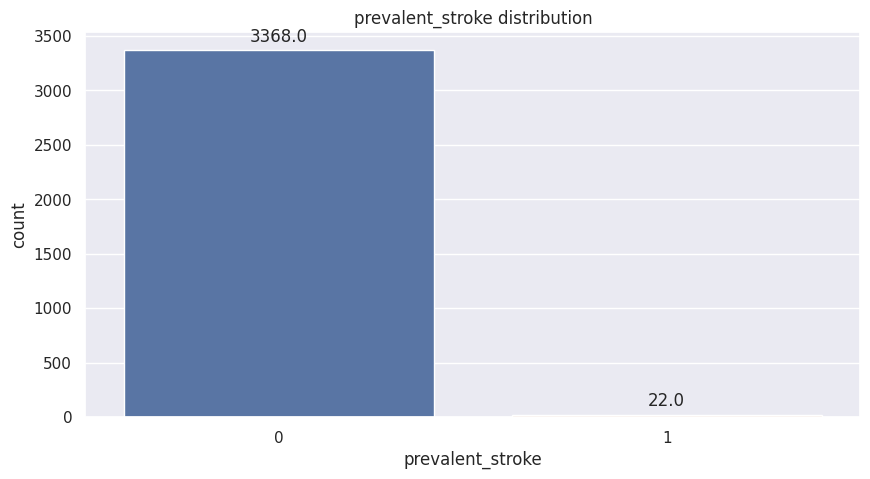

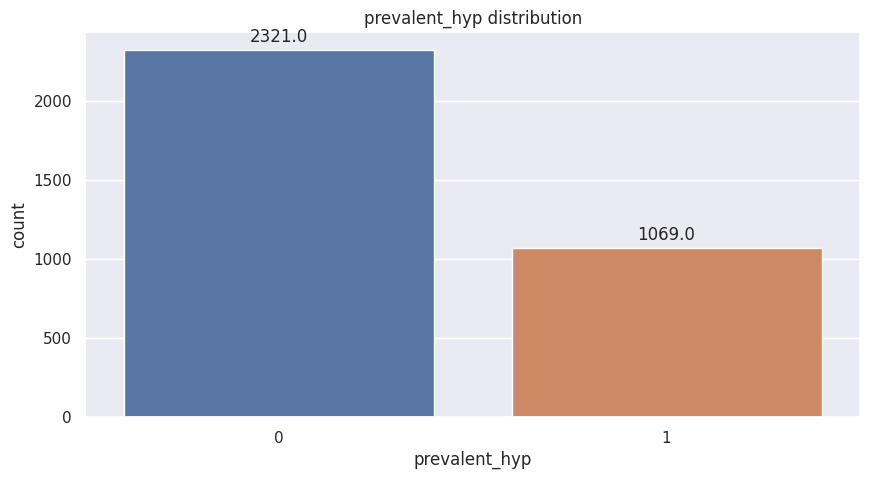

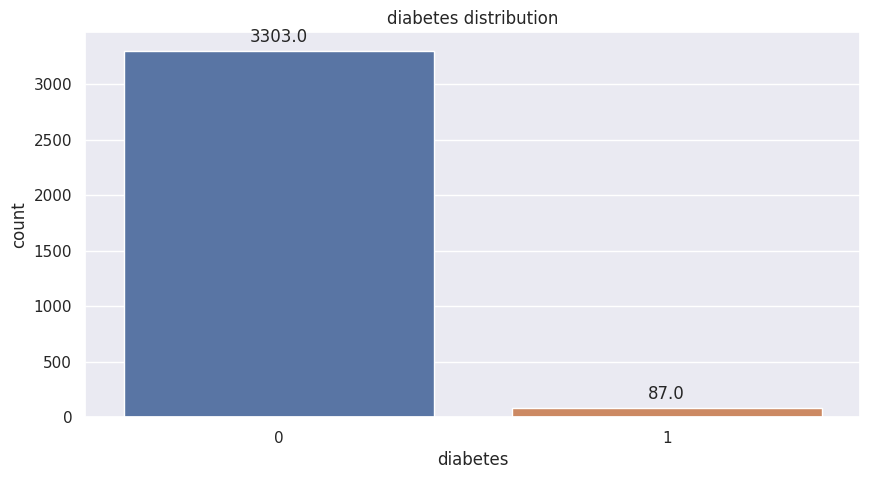

In [44]:
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize = (10, 5))
  p = sns.countplot(data = cardio_df , x = i)
  plt.xlabel(i)
  plt.title(i + ' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()
#i.get_height() retrieves the count of the current bar,
 #(i.get_x() + i.get_width()/2, i.get_height()) specifies the coordinates to place the annotation

Summary:
* **Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.**
* **There are more female patients compared to male patients.**(male = 1, females = 0)
* **Almost half the patients are smokers.**(yes = 1, no = 0)
* **100 patients under the study are undertaking blood pressure medication.**
* **22 patients under the study have experienced a stroke.**
* **1069 patients have hypertension.**
* **87 patients have diabetes.**

## **6.4. Analyzing the relationship between the dependent variable and the continuous variables in the data:**

<Figure size 1000x500 with 0 Axes>

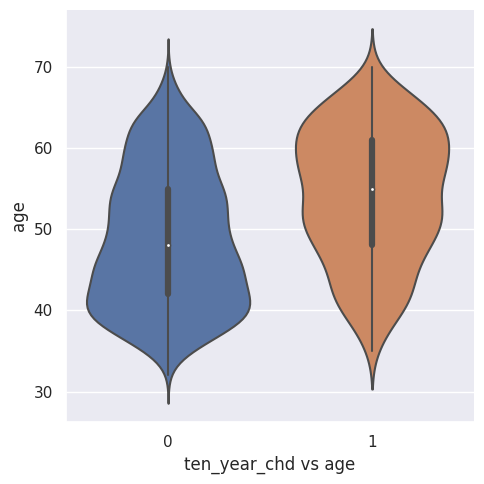

<Figure size 1000x500 with 0 Axes>

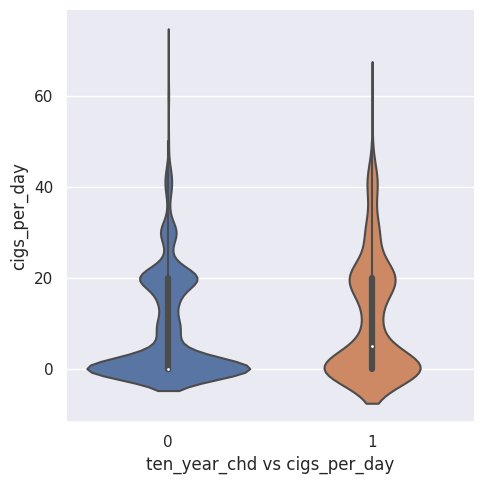

<Figure size 1000x500 with 0 Axes>

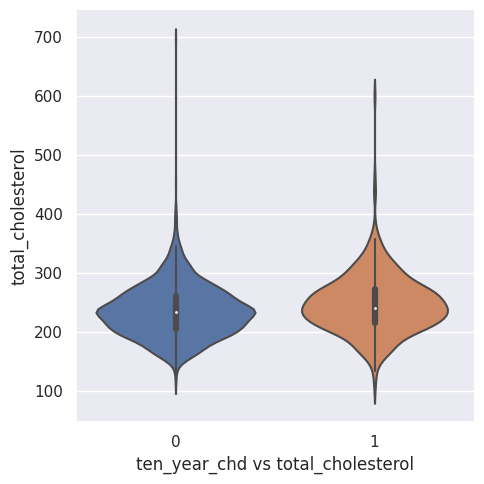

<Figure size 1000x500 with 0 Axes>

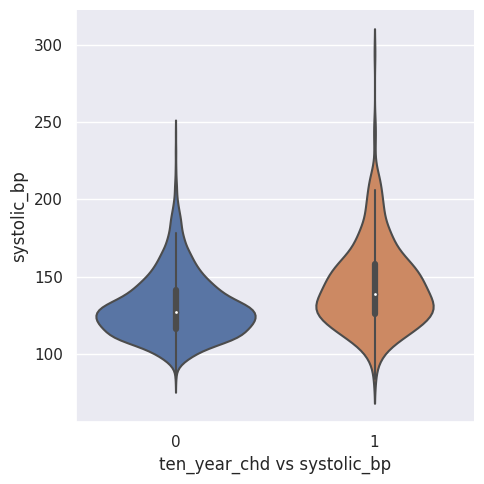

<Figure size 1000x500 with 0 Axes>

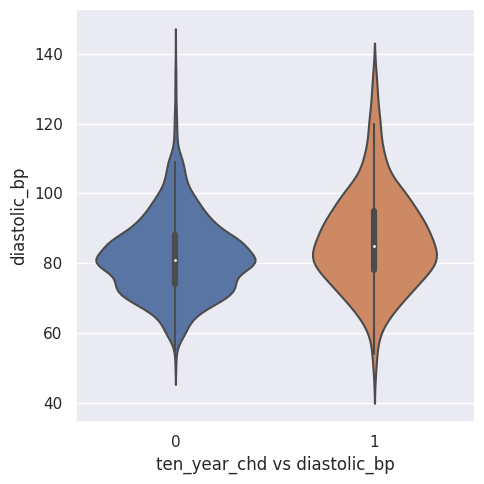

<Figure size 1000x500 with 0 Axes>

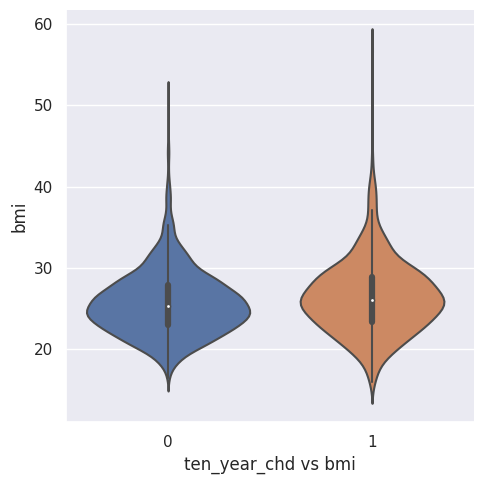

<Figure size 1000x500 with 0 Axes>

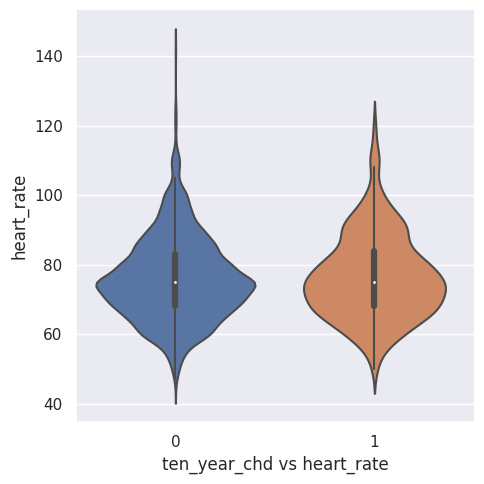

<Figure size 1000x500 with 0 Axes>

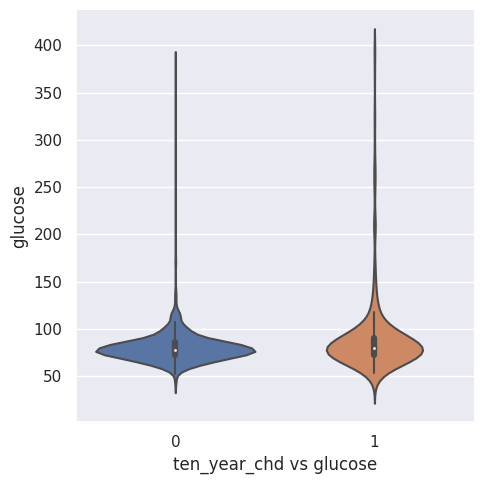

In [45]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize = (10,5))
  sns.catplot(x = dependent_var[0], y = i , data= cardio_df, kind = 'violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0] + " vs " + i)
  plt.show()

Summary:
* **The risk of CHD is higher for older patients than younger patients.**
* No conclusive evidence on the risk of CHD with other continuous variables

## **6.5. Analyzing the relationship between the dependent variable and the discrete variables in the data:**

<Figure size 1000x500 with 0 Axes>

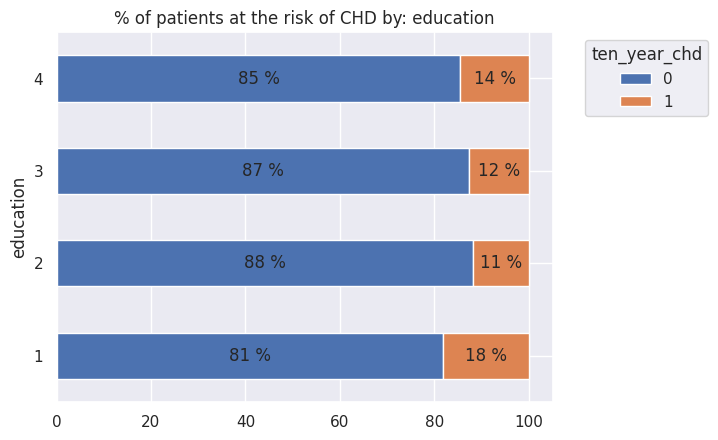

<Figure size 1000x500 with 0 Axes>

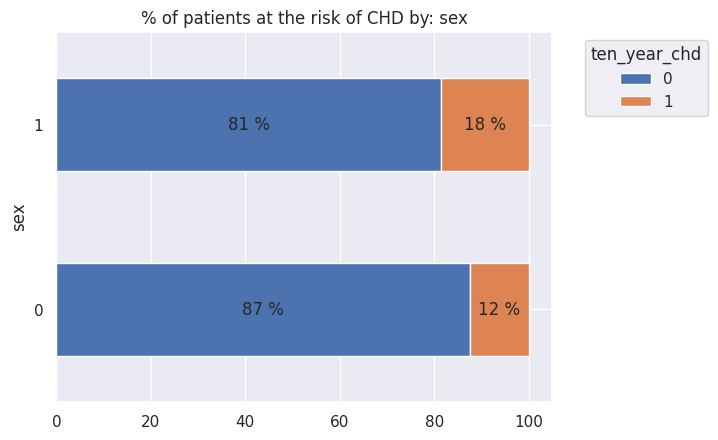

<Figure size 1000x500 with 0 Axes>

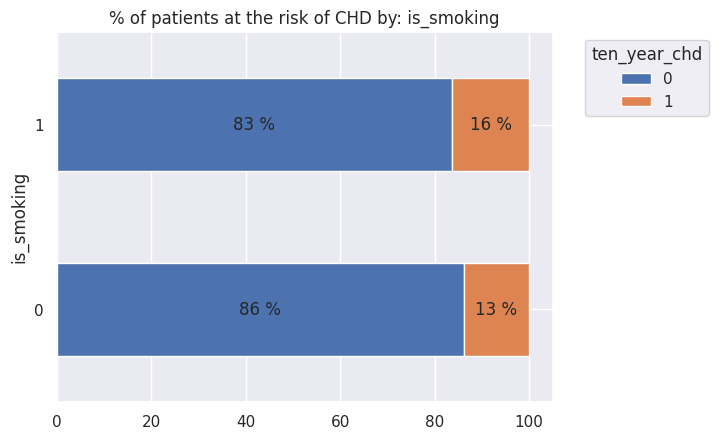

<Figure size 1000x500 with 0 Axes>

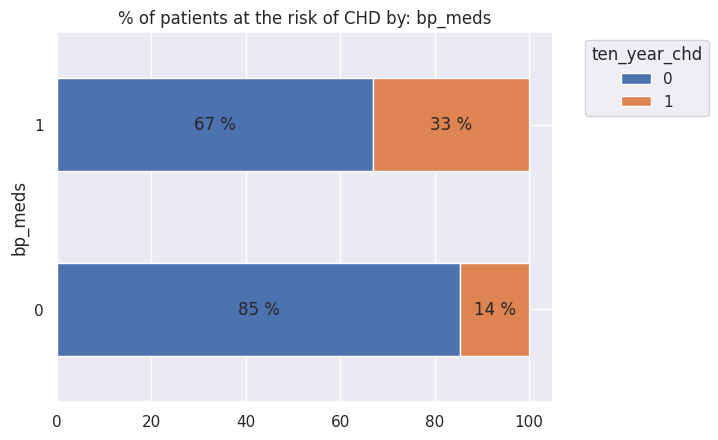

<Figure size 1000x500 with 0 Axes>

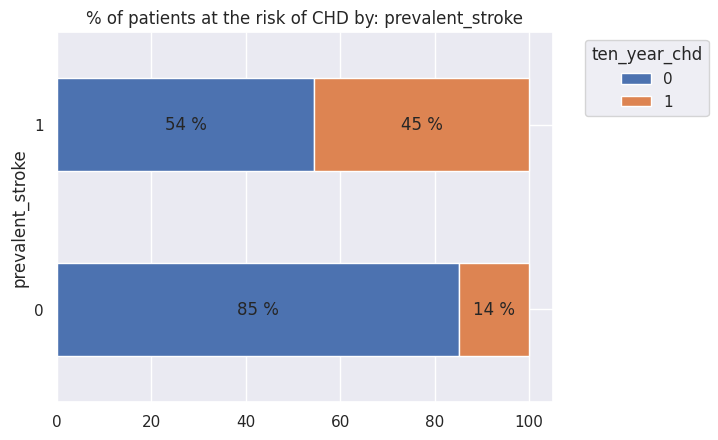

<Figure size 1000x500 with 0 Axes>

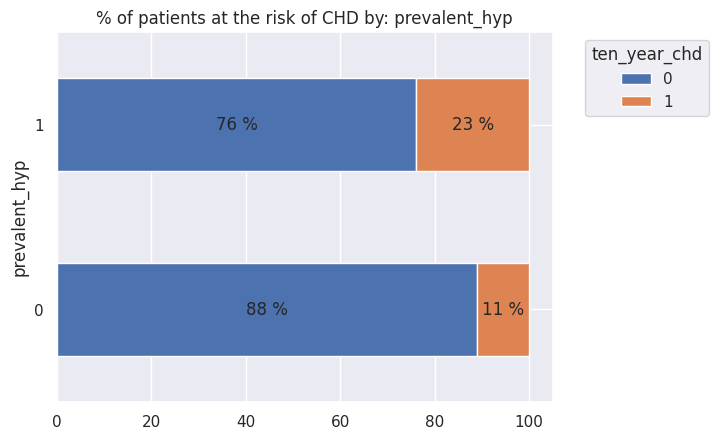

<Figure size 1000x500 with 0 Axes>

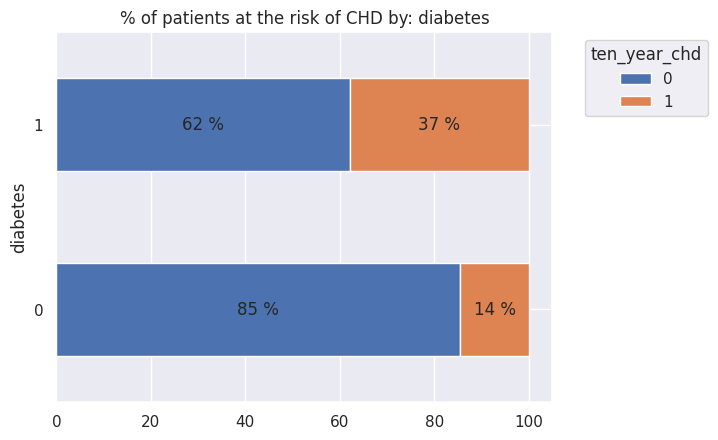

In [46]:
# Analyzing the relationship between the dependent variable and categorical independent variables
# 100% stacked bar chart

for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = cardio_df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

Summary:
* **18%, 11%, 12%, 14% of the patients belonging to the education level 1, 2, 3, 4 respectively were eventually diagnosed with CHD.**
* **Male patients have significantly higher risk of CHD (18%) than female patients (12%)**
* **Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)**
* **Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)**
* **Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)**
* **Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)**
* **Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)**

## **6.6. Correlation analysis:**

<Axes: title={'center': 'Correlation Ananlysis'}>

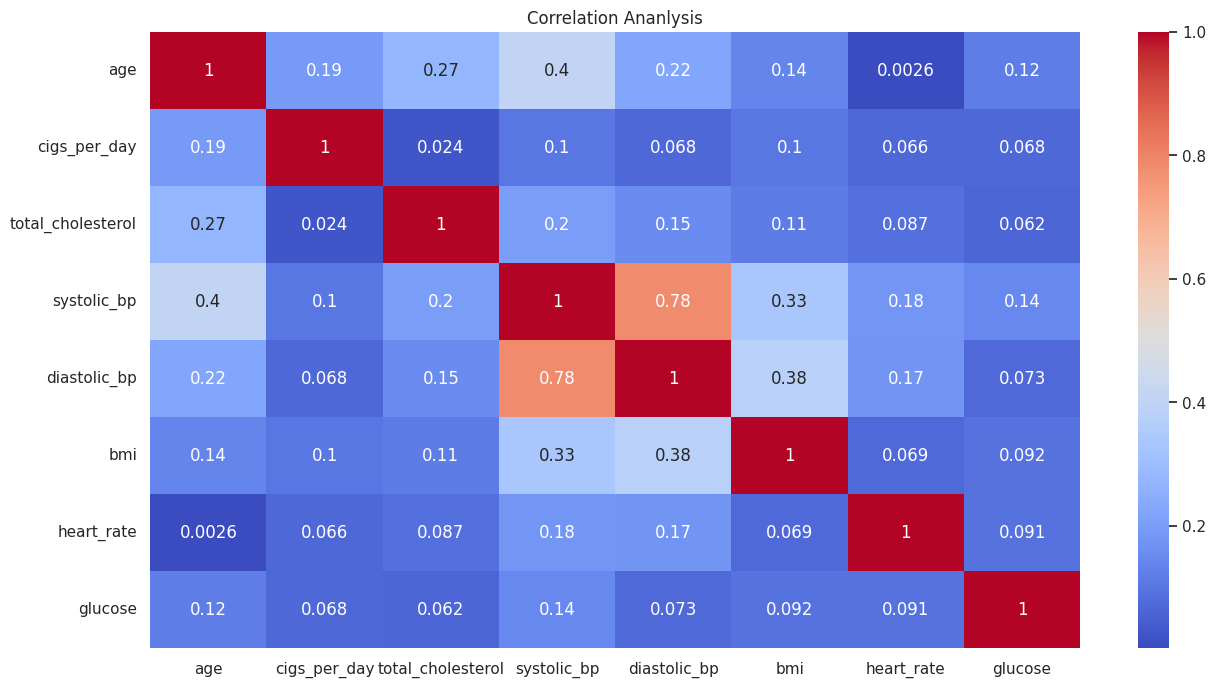

In [47]:
plt.figure(figsize = (15, 8))
plt.title( 'Correlation Ananlysis')
correlation = cardio_df[continuous_var].corr()
sns.heatmap(abs(correlation) , annot = True , cmap = 'coolwarm')

* **Above is the correlation magnitude heatmap for all the continuous variables in the dataset.**
* **The variables systolic BP and diastolic BP are highly correlated.**

## **6.7. Handling Multicollinearity:**

In [48]:
# Range of systolic bp and diastolic bp
print(cardio_df['systolic_bp'].min(), cardio_df['systolic_bp'].max())
print(cardio_df['diastolic_bp'].min(), cardio_df['diastolic_bp'].max())

83.5 295.0
48.0 142.5


To handle multicollinearity between these two independent continuous variables, we can replace these two columns with a new variable 'pulse pressure', which is given as follows:

**Pulse Pressure = Systolic BP - Diastolic BP**

From the above resource, we also found that:
* The normal pulse pressure is around 40 mmHg
* Pulse pressures of 50 mmHg or more can increase the risk of heart disease, heart rhythm disorders, stroke and more.
* Higher pulse pressures are also thought to play a role in eye and kidney damage from diseases like diabetes.
* Low pulse pressure - is where the pulse pressure is one-fourth or less of the systolic blood pressure.
* This happens when your heart isn’t pumping enough blood, which is seen in heart failure and certain heart valve diseases. It also happens when a person has been injured and lost a lot of blood or is bleeding internally.

In [49]:
# Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp
cardio_df['pulse_pressure']  = cardio_df['systolic_bp'] - cardio_df['diastolic_bp']
cardio_df.drop('systolic_bp', axis = 1,inplace = True)
cardio_df.drop('diastolic_bp', axis = 1,inplace = True)

In [50]:
cardio_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure'],
      dtype='object')

In [51]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

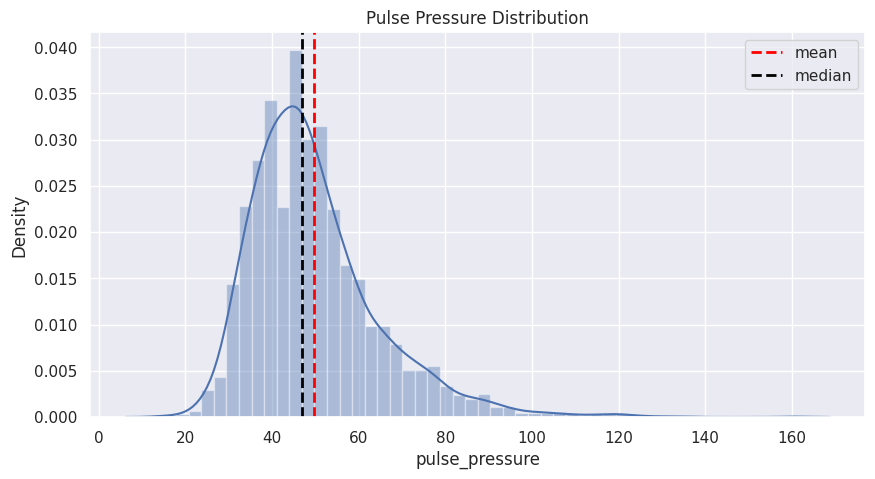

In [52]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(cardio_df['pulse_pressure'])
plt.axvline(cardio_df['pulse_pressure'].mean(), color='red', linestyle='dashed', linewidth=2 ,  label = 'mean')
plt.axvline(cardio_df['pulse_pressure'].median(), color='black', linestyle='dashed', linewidth=2 , label = 'median')
plt.title('Pulse Pressure Distribution')
plt.legend()
plt.show()

**The pulse pressures are positively skewed**

<Figure size 1000x500 with 0 Axes>

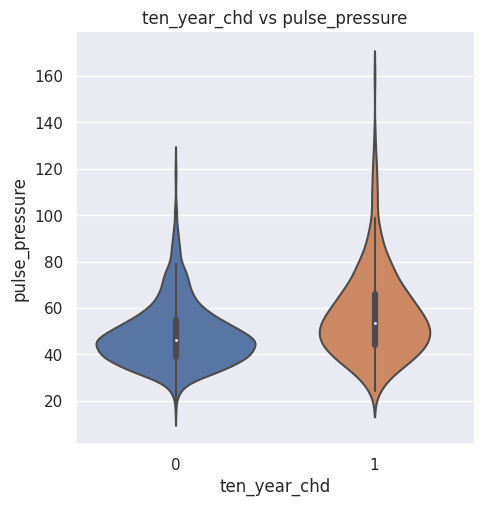

In [53]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data= cardio_df,kind='violin')
plt.title('ten_year_chd vs pulse_pressure')
plt.show()

**On average, the patients with higher pulse pressure are exposed to the coronary heart disease over the period of 10 years.**

<Axes: title={'center': 'Correlation Analysis'}>

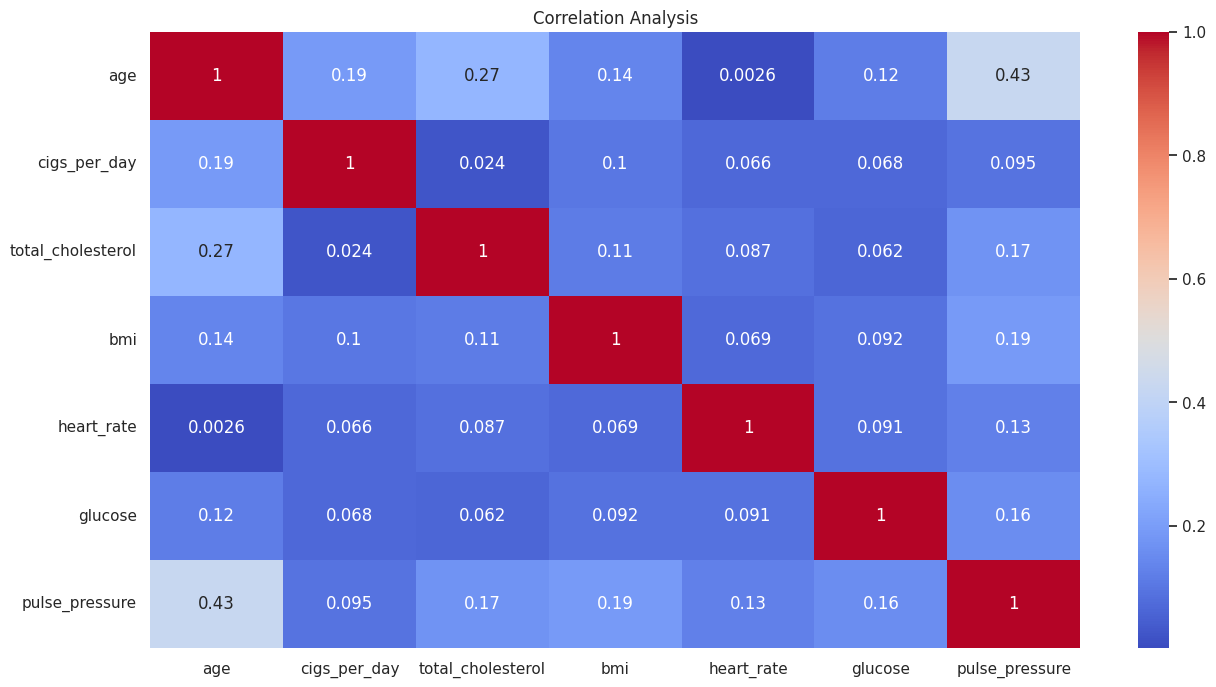

In [54]:
# Updated correlations
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = cardio_df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**We were successful in handling multicollinearity amongst the continuous variables in the dataset.**

# **7. Feature Selection:**

## **7.1. Discrete feature selection:**

To check whether discrete variables are related, chi2 test can be used. We define:
1. Null Hypothesis (H0): Two variables are independent.
2. Alternate Hypothesis (H1): Two variables are not independent.

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

In [55]:
# chi2 scores
chi_scores = chi2(cardio_df[categorical_var], cardio_df[dependent_var])
chi_scores

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

In [56]:
#  P values for discrete features
p_values = pd.Series(chi_scores[1], index = cardio_df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking          1.588409e-01
education           2.909740e-02
sex                 2.056887e-04
prevalent_stroke    6.813318e-05
bp_meds             5.436407e-07
diabetes            2.542262e-09
prevalent_hyp       1.027137e-15
dtype: float64

<Axes: title={'center': 'P-value for discrete features'}>

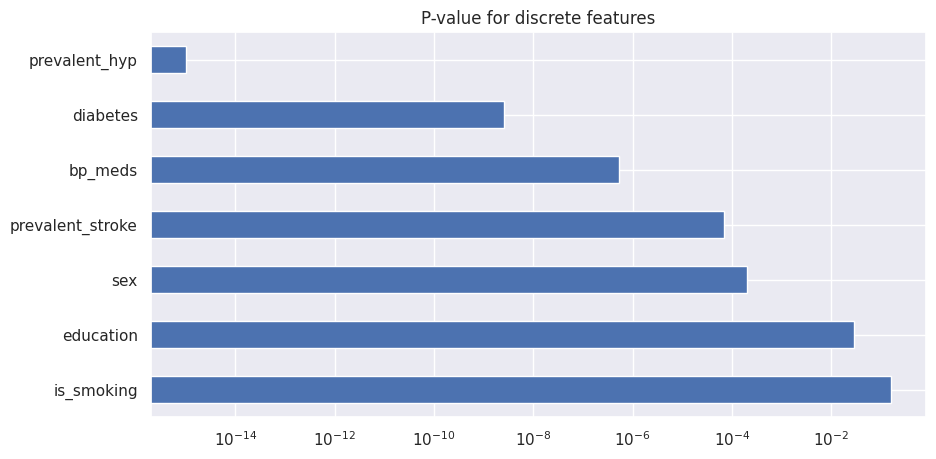

In [57]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

* **Since prevalent hypertension column (prevalent_hyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines  the outcome of the dependent variable.**
* **The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).**
* **We can drop this column since we already have a column cigs_per_day, which gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.**

In [58]:
# dropping is_smoking
cardio_df.drop('is_smoking',axis=1,inplace=True)

In [59]:
# dropping is smoking
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

## **7.2. Outlier analysis:**

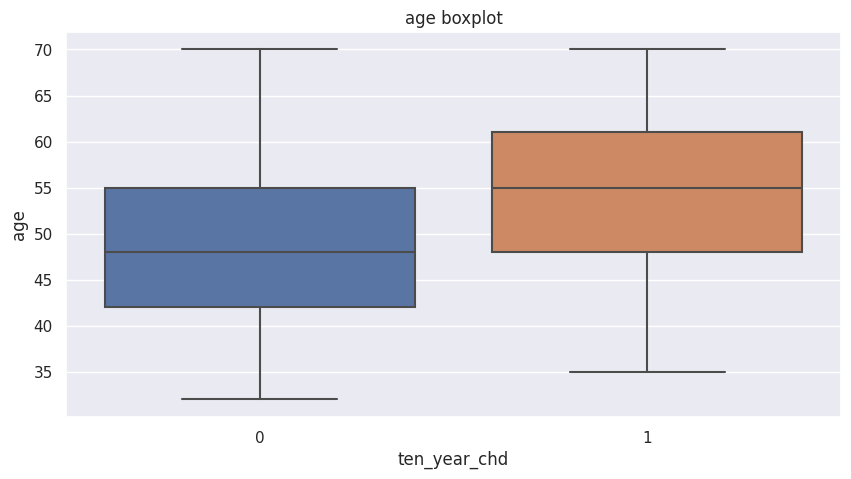

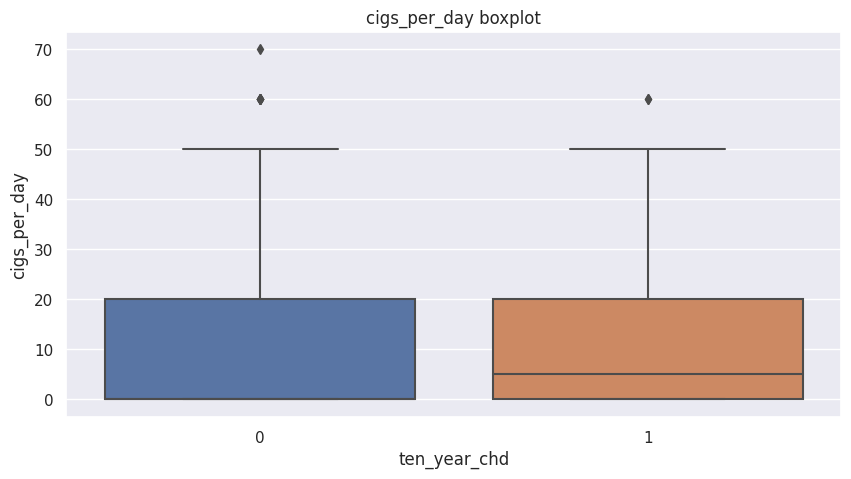

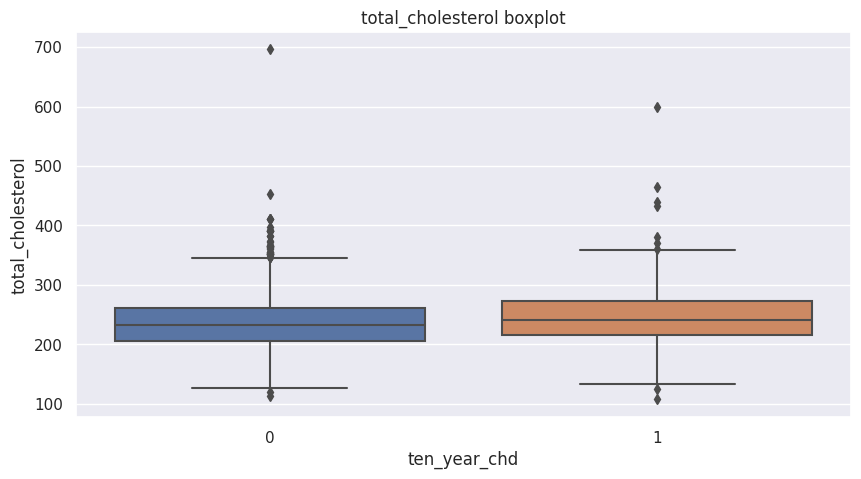

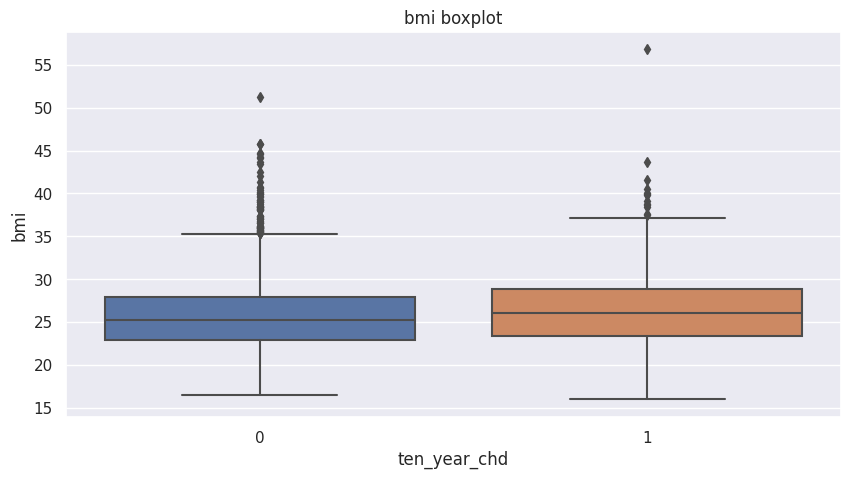

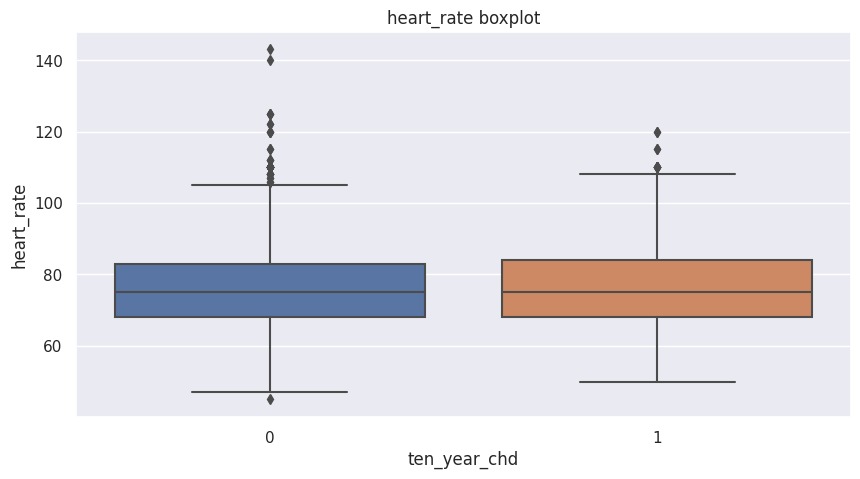

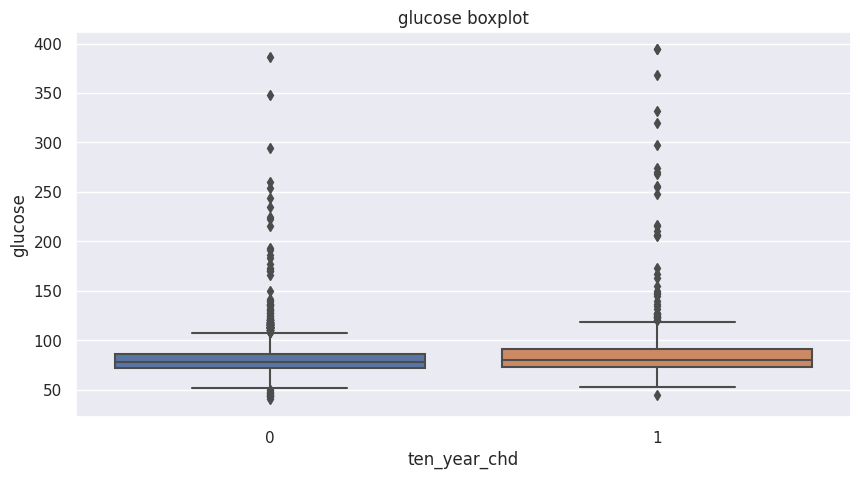

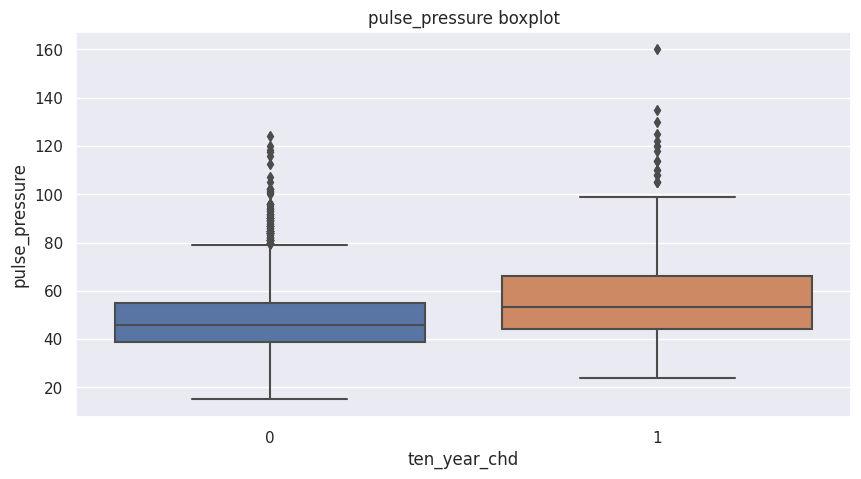

In [60]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=cardio_df)
  plt.title(col+' boxplot')
  plt.show()

* **There are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.**
* **Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.**
* **This is done on the train data only to prevent data leakage.**

## **7.3. Transforming continuous variables to reduce skew:**

In [61]:
# skewness along the index axis
(cardio_df[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
glucose              6.361911
pulse_pressure       1.412382
dtype: float64

**Many continuous variables are skewed. By log transformation, we aim to reduce the magnitude of skew in these variables to a certain extent.**

In [62]:
# Skew for log10 transformation
np.log10(cardio_df[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.310918
pulse_pressure       0.354174
dtype: float64

**We can clearly see that by log transformation of the continuous variables, we are able to reduce it's skew to some extent.**


In [63]:
# Implementing log transformation on continuous variables

cardio_df['age']                   = np.log10(cardio_df['age']+1)
cardio_df['cigs_per_day']          = np.log10(cardio_df['cigs_per_day']+1)
cardio_df['total_cholesterol']     = np.log10(cardio_df['total_cholesterol']+1)
cardio_df['bmi']                   = np.log10(cardio_df['bmi']+1)
cardio_df['heart_rate']            = np.log10(cardio_df['heart_rate']+1)
cardio_df['glucose']               = np.log10(cardio_df['glucose']+1)
cardio_df['pulse_pressure']        = np.log10(cardio_df['pulse_pressure']+1)

In [64]:
# Checking skew after log transformation
cardio_df[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.310918
pulse_pressure       0.354174
dtype: float64

## **7.4. Analyzing the distribution of transformed features:**

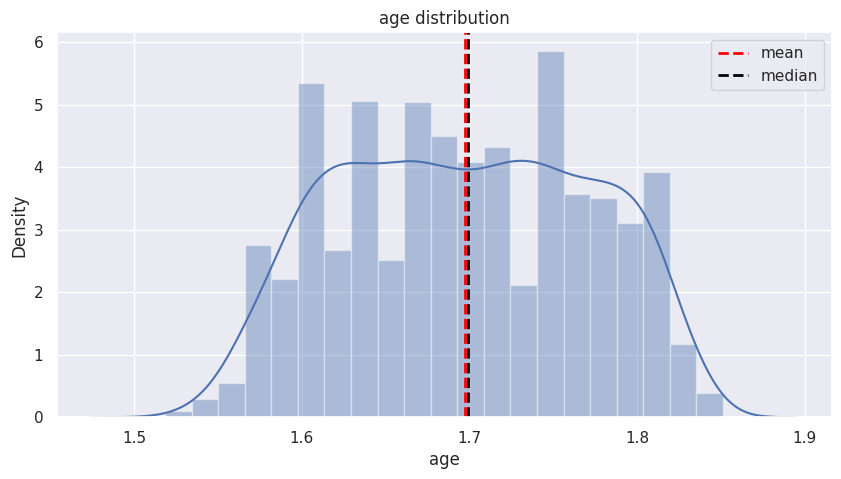

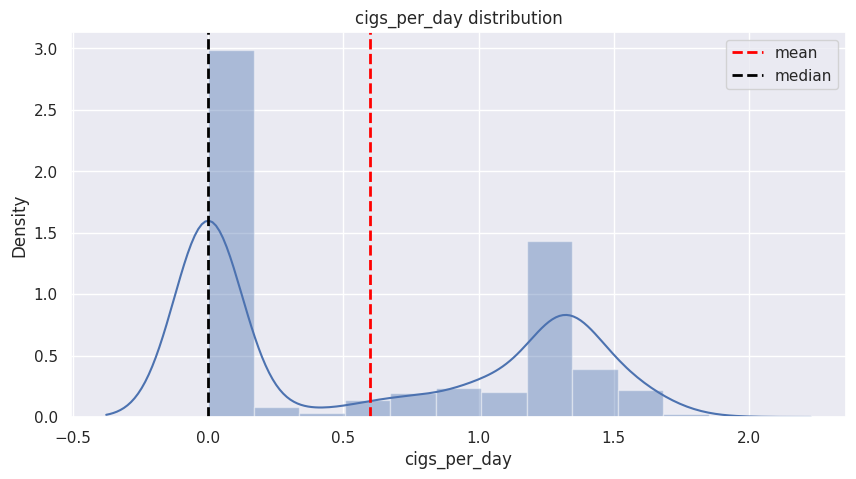

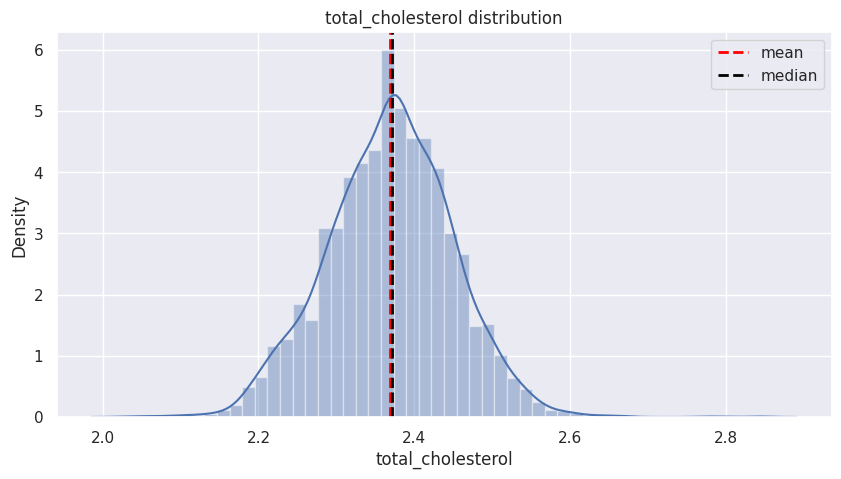

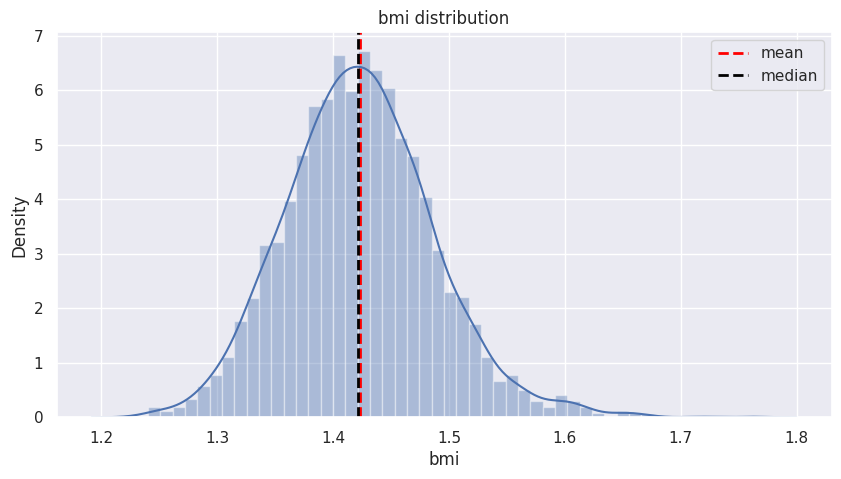

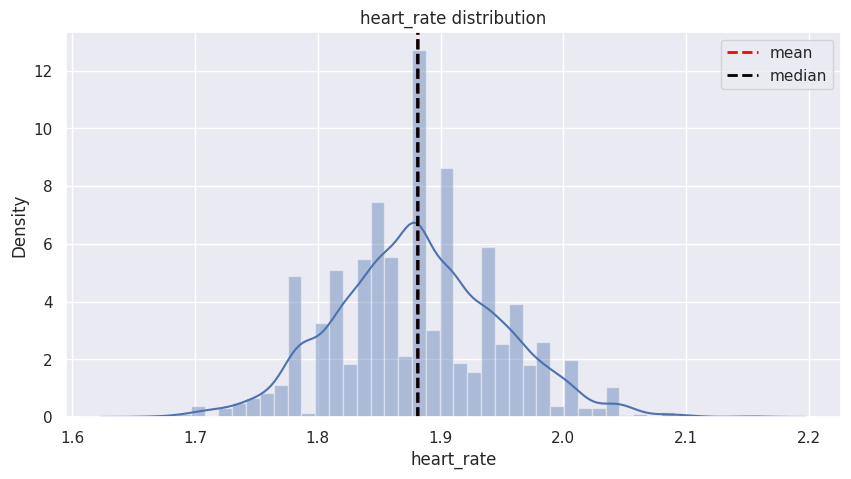

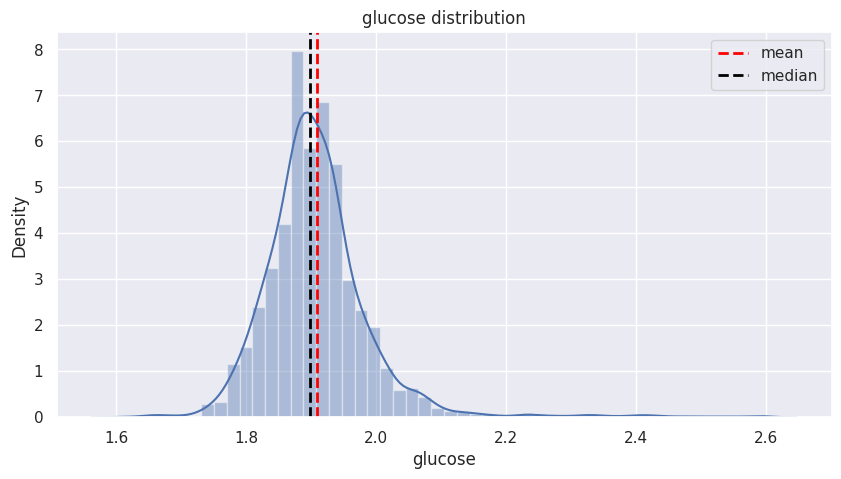

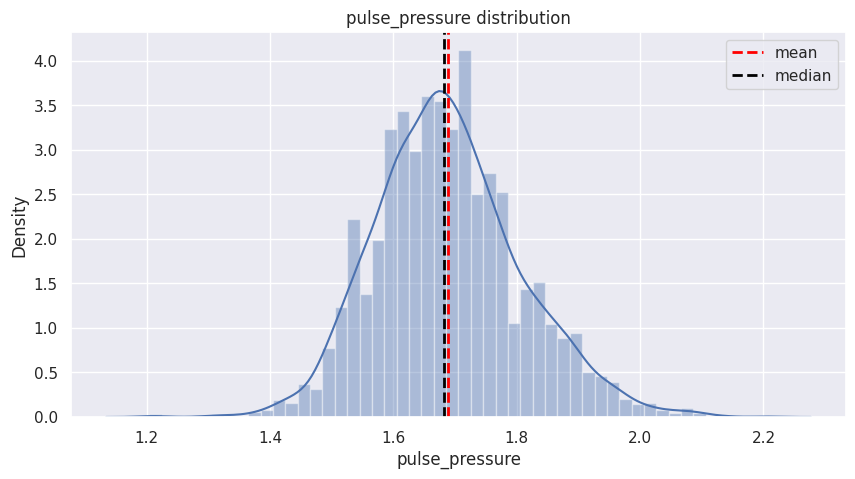

In [65]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(cardio_df[col])
  plt.axvline(cardio_df[col].mean(), color='red', linestyle='dashed', linewidth=2, label = 'mean')
  plt.axvline(cardio_df[col].median(), color='black', linestyle='dashed', linewidth=2, label= 'median')
  plt.title(col+' distribution')
  plt.legend()
  plt.show()

**Except cigs_per_day, we have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.**

## **7.5. Checking for outliers in transformed features:**

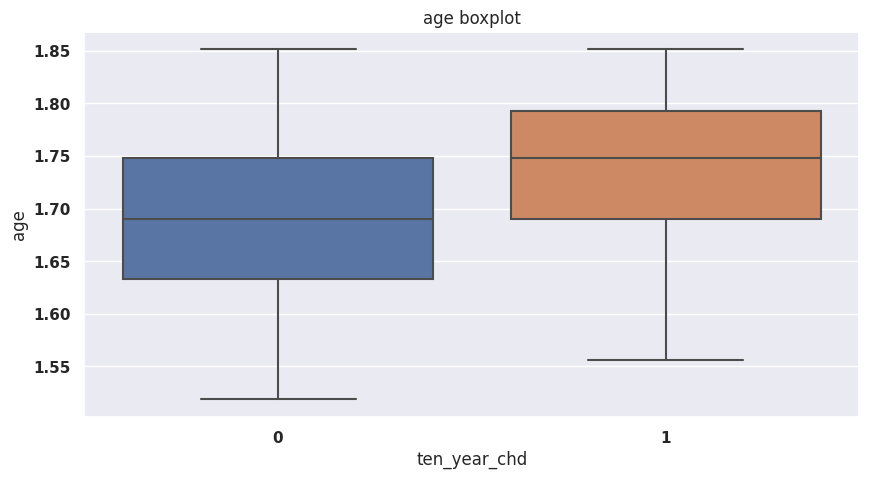

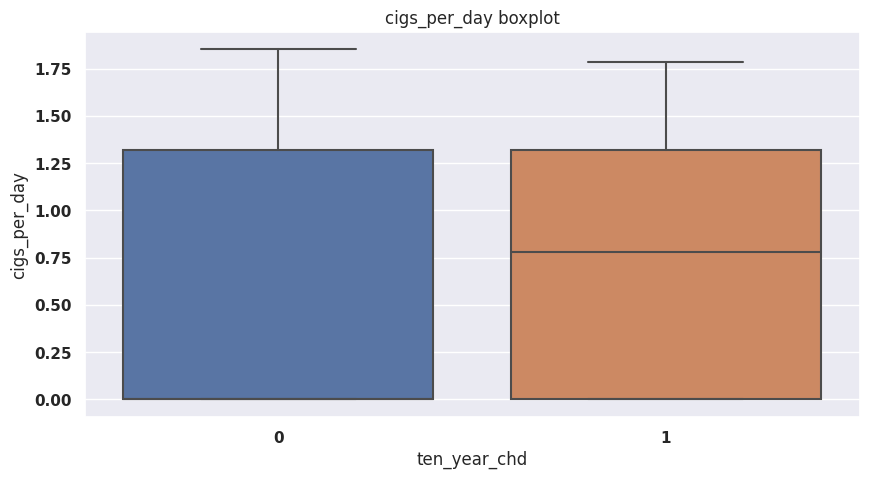

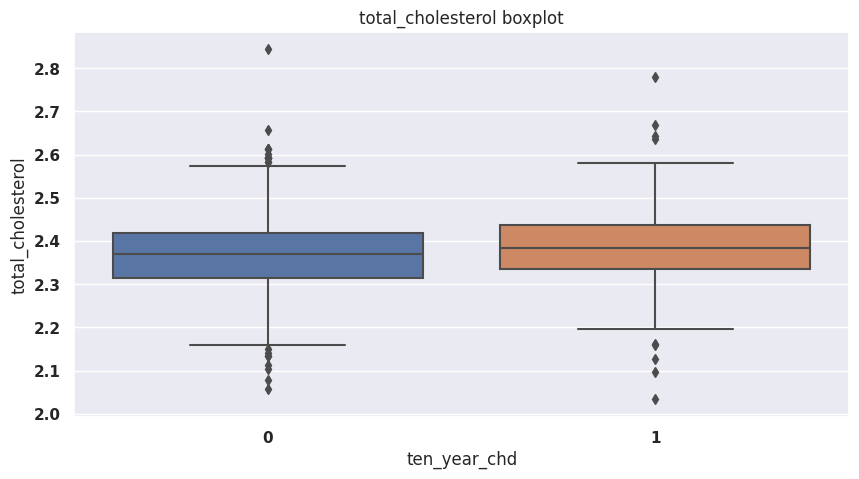

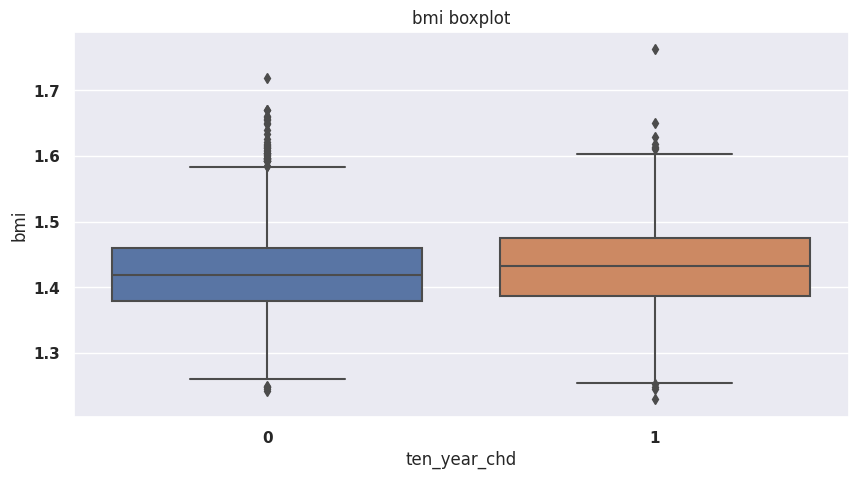

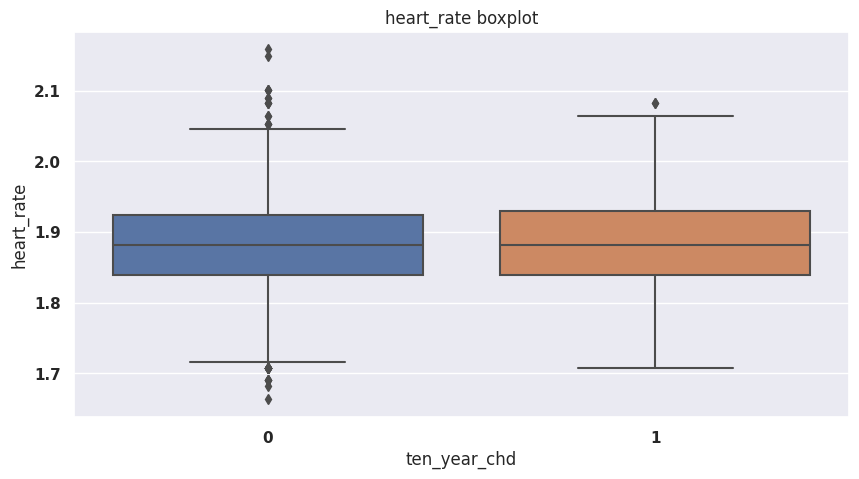

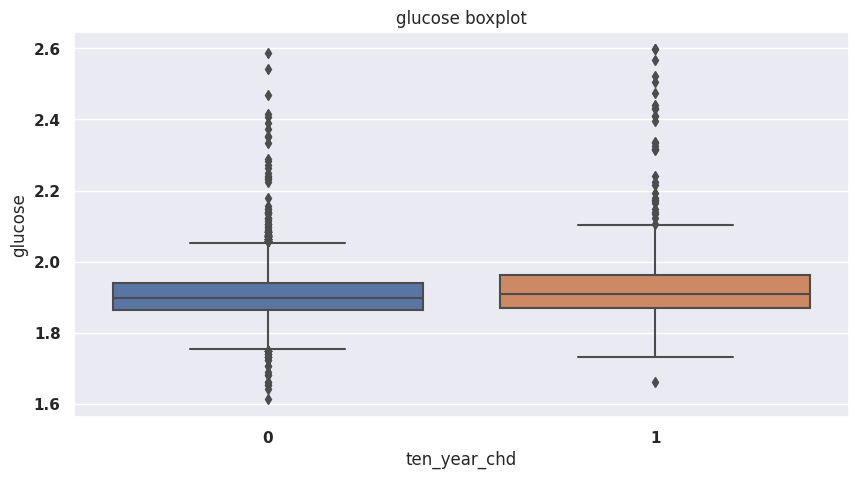

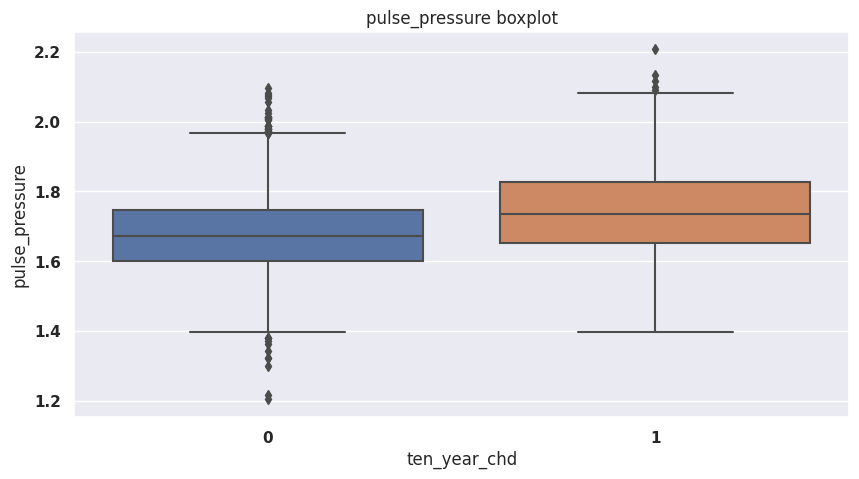

In [158]:
# checking for outliers in log transformed features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=cardio_df)
  plt.title(col+' boxplot')
  plt.show()

* **Except for age and cigs_per_day columns, rest of the numerical columns contain outliers even after log transformation.**
* **To handle this, we can impute the outliers beyond 3 standard deviations from the mean with its median value on the train data.**

# **8. Data Preprocessing:**

In [67]:
# Defining dependent and independent variables
X = cardio_df.drop('ten_year_chd',axis=1)
y = cardio_df[dependent_var]

## **8.1. Choice of prediction model:**

* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* Try other standard binary classification models like  K nearest neighbors, Naive Bayes, decision tree classifier, and support vector machines.
* Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

## **8.2. Evaluation metrics:**
* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Recall** as the model evaluation metric.


\begin{align}
        Recall = \frac{TruePositive}{True Positive + False Negative}
    \end{align}

In [68]:
# function to get recall score
def recall(actual,predicted):
  '''
  recall (actual, Predicted)
  '''
  return recall_score(y_true = actual, y_pred =predicted, average = 'binary')

## **8.3. Train Test Split:**

* Since we are working with limited amount of data, ie, around 3390 records, **30%** of the records are set aside for testing, 70%  for training.
* Since the data is imbalanced, **stratified split** was employed to get almost equal proportion of dependent variables in the train and test sets.

In [69]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [70]:
y_train.value_counts()

ten_year_chd
0               2015
1                358
dtype: int64

In [71]:
# Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [72]:
# Checking the test distribution of dependent variable
y_test.value_counts()


ten_year_chd
0               864
1               153
dtype: int64

In [73]:
# proportion fo positive outcomes in test dataset
153/(153+864)

0.1504424778761062

**The train and test set contain almost equal proportion of results.**

## **8.4. Handling outliers in the train data:**

Imputing the outliers in 'total_cholesterol', 'bmi', 'heart_rate', 'glucose', 'pulse_pressure' beyond 3 standard deviations from the mean with its median value.

In [74]:
# imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['total_cholesterol', 'bmi', 'heart_rate', 'glucose','pulse_pressure']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()

In [75]:
X_train[continuous_var].skew(axis = 0)

age                 -0.041549
cigs_per_day         0.268068
total_cholesterol   -0.035643
bmi                  0.187685
heart_rate           0.081343
glucose              0.388273
pulse_pressure       0.287254
dtype: float64

**We were successsful in handling outliers in the train data, and thereby reducing skew.**

## **8.5. Oversampling:**
* Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
* This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

<Axes: title={'center': 'Target variable before SMOTE'}, xlabel='ten_year_chd'>

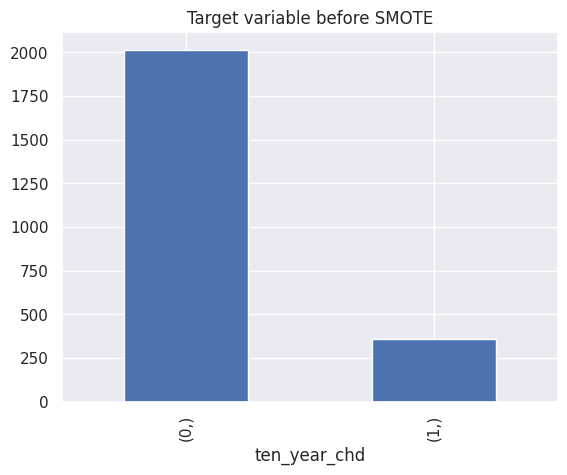

In [76]:
# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [77]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2373
Samples in the resampled dataset 4030


<Axes: title={'center': 'Target variable after SMOTE'}, xlabel='ten_year_chd'>

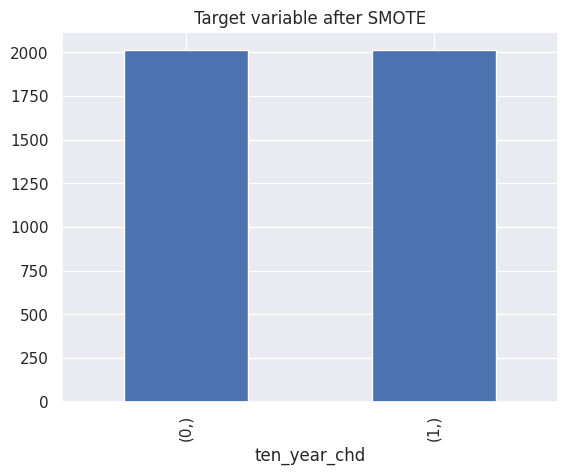

In [78]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

**We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.**

## **8.6. Scaling the data:**
* Since the predictions from the distance based models will get affected if the attributes are in different ranges, we need to scale them.
* We can use StandardScaler to scale down the variables.
* The results obtained from scaling can be stored and used while building those models.
* Tree algorithms do not necessarily require scaling.

In [79]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [80]:
# Scaled train values
X_train_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-0.231189,-0.929178,-0.870504,-0.939677,-0.18313,-0.079758,1.456835,-0.166486,1.474985,0.563135,-0.004355,-1.562307,-1.093792
1,-1.756625,1.034259,-0.870504,1.275777,-0.18313,-0.079758,-0.686419,-0.166486,-0.326796,-1.191092,1.562895,0.243199,-0.655345
2,1.635167,-0.929178,-0.870504,-0.939677,-0.18313,-0.079758,1.456835,6.006507,1.456862,-0.087240,0.586729,2.491574,1.082515
3,-0.741135,-0.929178,1.148759,1.130550,-0.18313,-0.079758,-0.686419,-0.166486,-1.587394,-2.405579,0.902491,-0.080258,-0.795905
4,-0.110346,0.052540,1.148759,1.585493,-0.18313,-0.079758,-0.686419,-0.166486,-0.178481,0.193663,-1.479325,-1.159185,-0.892610


In [81]:
# scaled SMOTE values
X_smote_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-0.459720,-0.882231,-0.93697,-0.987958,-0.18474,-0.065086,1.242009,-0.178914,1.462650,0.507969,-0.020849,-1.656437,-1.296360
1,-2.065761,1.106243,-0.93697,1.190826,-0.18474,-0.065086,-0.805147,-0.178914,-0.457413,-1.323508,1.656203,0.236522,-0.851487
2,1.505255,-0.882231,-0.93697,-0.987958,-0.18474,-0.065086,1.242009,5.589275,1.443336,-0.171045,0.611647,2.593803,0.911840
3,-0.996611,-0.882231,1.06727,1.048003,-0.18474,-0.065086,-0.805147,-0.178914,-1.800767,-2.591477,0.949531,-0.102602,-0.994107
4,-0.332491,0.112006,1.06727,1.495416,-0.18474,-0.065086,-0.805147,-0.178914,-0.299362,0.122227,-1.599155,-1.233789,-1.092229


In [82]:
# scaled test values
X_test_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-1.584710,1.106243,-0.93697,-0.060903,-0.18474,-0.065086,-0.805147,-0.178914,-1.443069,-1.433222,0.436548,0.480307,-1.142250
1,-0.207833,0.112006,-0.93697,-0.987958,-0.18474,-0.065086,-0.805147,-0.178914,1.166094,-0.359723,0.436548,-0.459350,-0.369801
2,0.600659,-0.882231,1.06727,-0.987958,-0.18474,-0.065086,-0.805147,-0.178914,0.126741,0.518259,0.436548,0.792445,0.237656
3,0.380265,-0.882231,-0.93697,-0.987958,-0.18474,-0.065086,-0.805147,-0.178914,0.078179,0.507969,0.257071,-0.459350,-2.046801
4,-0.332491,0.112006,1.06727,-0.987958,-0.18474,-0.065086,-0.805147,-0.178914,0.222681,-1.070494,0.257071,0.318749,0.130862


**We have successfully scaled down the variables using standard scaler.**

# **9. ML Model Implementation:**

## **9.1. Logistic Regression**

In [83]:
# Fitting model
lr_model = LogisticRegression()

In [84]:
# training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [85]:
# train Predictions
lr_train_pred = lr_model.predict(X_smote_scaled)

In [86]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.6853598014888338

In [87]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

In [88]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.6274509803921569

In [89]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       864
           1       0.26      0.63      0.36       153

    accuracy                           0.67      1017
   macro avg       0.58      0.65      0.57      1017
weighted avg       0.81      0.67      0.71      1017



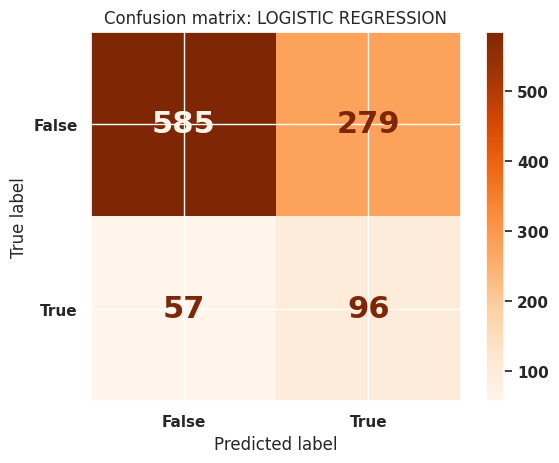

In [90]:
# Confusion matrix

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

**False negatives obtained after using logistic regression: 57**

## **9.3. Naive Bayes:**

In [91]:
# Using stratified k fold cross validation so that each split
# has almost equal proportion of classification results
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3,
                                    random_state=0)

In [92]:
# Fitting model
nb_model = GaussianNB()

In [93]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [94]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [95]:
# model best parameters
nb_best_params

{'var_smoothing': 1.0}

In [96]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [97]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [98]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)

In [99]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)

In [145]:
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.6347394540942928

In [146]:
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.5816993464052288

In [100]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       864
           1       0.26      0.58      0.36       153

    accuracy                           0.68      1017
   macro avg       0.58      0.64      0.57      1017
weighted avg       0.81      0.68      0.73      1017



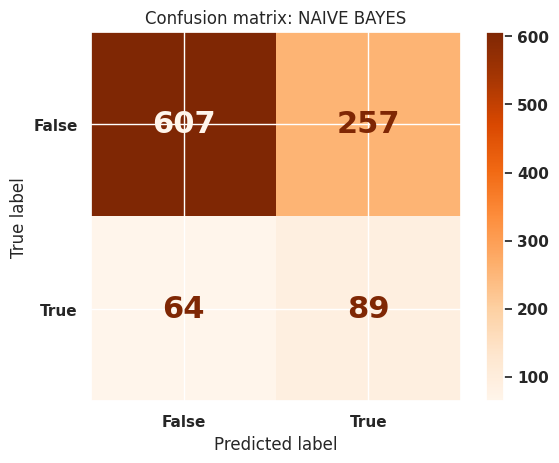

In [101]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

**False negatives obtained after using Naive Bayes: 64**

## **9.4. Decision tree:**

In [102]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [103]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [104]:
# model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [105]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [106]:
# training the model
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [107]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)

In [108]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)

In [147]:
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.8277915632754342

In [148]:
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.8235294117647058

In [109]:
# Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.49      0.64       864
           1       0.22      0.82      0.35       153

    accuracy                           0.54      1017
   macro avg       0.58      0.66      0.50      1017
weighted avg       0.83      0.54      0.60      1017



<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

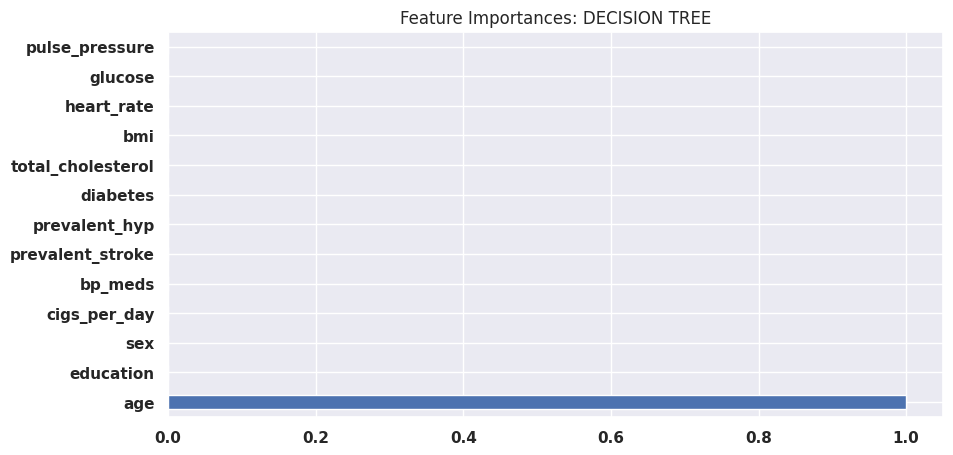

In [110]:
# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

**Only one feature (age) was given imporatance while fitting a decision tree model. This is because of max depth being 1.**

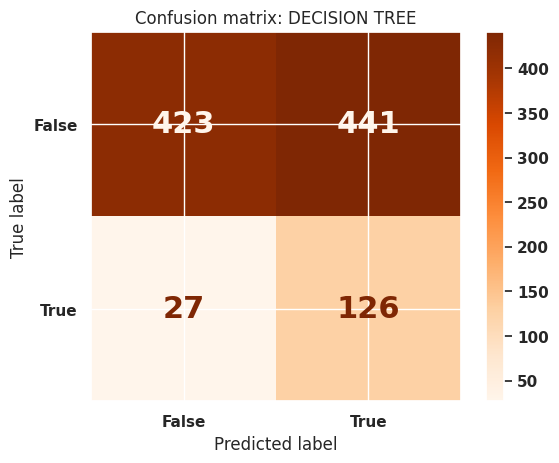

In [111]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

**False negatives obtained after using decision tree: 27**

## **9.5. Support Vector Machines:**

In [112]:
# SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [113]:
# Using gridsearchcv to find best parameters
from sklearn.model_selection import RandomizedSearchCV
svm_random_search = RandomizedSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_random_search.fit(X_smote_scaled,y_smote)
svm_best_params = svm_random_search.best_params_

In [114]:
# model best parameters
svm_best_params

{'kernel': 'rbf', 'gamma': 0.01, 'C': 1}

In [115]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [116]:
# training the model
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=1, gamma=0.01)

In [117]:
# Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)

In [118]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)

In [149]:
# training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.7364764267990075

In [150]:
# Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.5816993464052288

In [119]:
# Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       864
           1       0.24      0.58      0.34       153

    accuracy                           0.66      1017
   macro avg       0.57      0.63      0.55      1017
weighted avg       0.80      0.66      0.70      1017



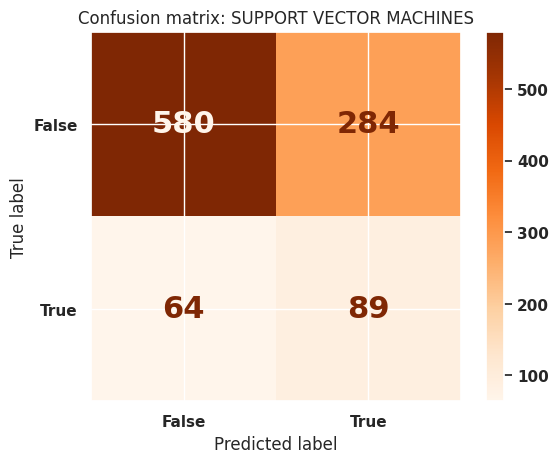

In [120]:
# Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

**False negatives obtained after using SVM: 64**

## **9.6. Random forests:**

In [122]:
# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [124]:
# using gridsearchcv to find best parameters
rf_random_search = RandomizedSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_random_search.fit(X_smote,y_smote)
rf_best_params = rf_random_search.best_params_

In [125]:
# best parameters for random forests
rf_best_params

{'n_estimators': 500,
 'min_samples_split': 0.4,
 'min_samples_leaf': 0.30000000000000004,
 'max_depth': 5}

In [126]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)

In [127]:
# fit
rf_model.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=5, min_samples_leaf=0.30000000000000004,
                       min_samples_split=0.4, n_estimators=500, random_state=0)

In [128]:
# train predictions
rf_train_pred = rf_model.predict(X_smote)

In [129]:
# Test predictions
rf_test_pred = rf_model.predict(X_test)

In [151]:
# train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall

0.6516129032258065

In [152]:
# test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall

0.6078431372549019

In [130]:
# Classification report
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       864
           1       0.24      0.61      0.34       153

    accuracy                           0.65      1017
   macro avg       0.57      0.63      0.55      1017
weighted avg       0.80      0.65      0.70      1017



<Axes: title={'center': 'Feature Importances: RANDOM FORESTS'}>

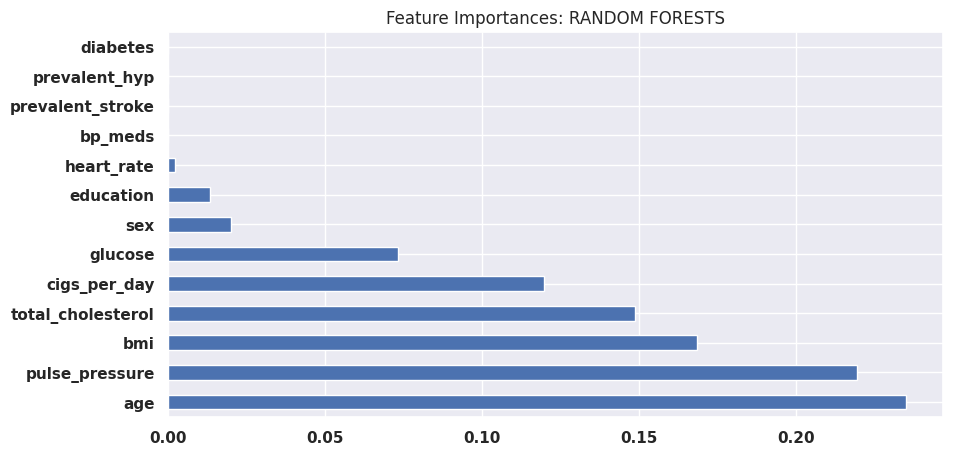

In [131]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* **Features other than age are also given importance in this case insted of just one feature in case of decision tree.**
* **But age still remains the most important feature in predicting the final outcome for random forests.**

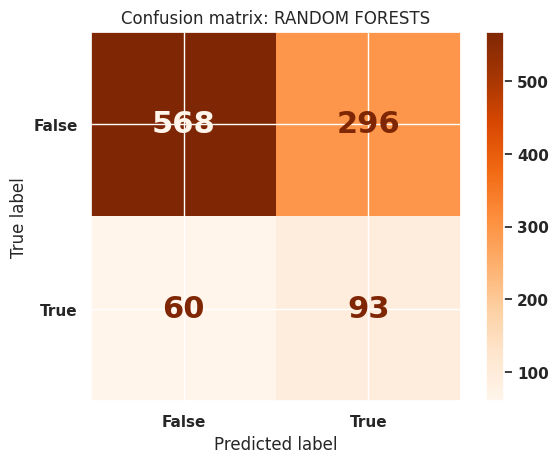

In [132]:
# Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

**False negatives obtained after using Random forests: 60**

## **9.7. XG Boost:**

In [133]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [134]:
# using gridsearchcv to find best parameters
xgb_random_search = RandomizedSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_random_search.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_random_search.best_params_

[17:09:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:09:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:09:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:09:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:09:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:09:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:09:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:09:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:09:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

In [135]:
# best parameters for xgboost classifier
xgb_best_params

{'n_estimators': 500,
 'min_samples_split': 0.2,
 'min_samples_leaf': 0.1,
 'max_depth': 1}

In [136]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [137]:
# fit
xgb_model.fit(X_smote_scaled,y_smote)

[17:10:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, min_samples_leaf=0.1,
              min_samples_split=0.2, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [138]:
# train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [139]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [140]:
# Classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       864
           1       0.25      0.46      0.32       153

    accuracy                           0.71      1017
   macro avg       0.57      0.61      0.57      1017
weighted avg       0.79      0.71      0.74      1017



<Axes: title={'center': 'Feature Importances: XG BOOST'}>

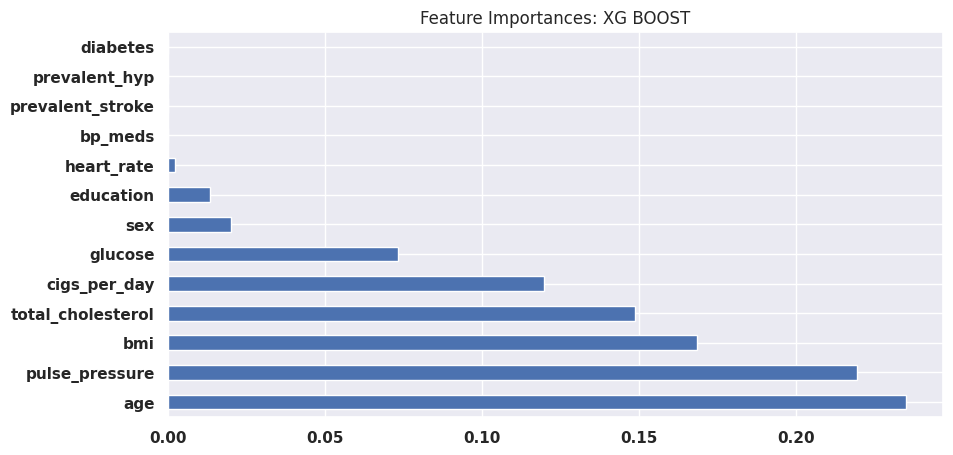

In [141]:
# Feature importances

xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* **Age in the most important feature in deciding the outcome of the variables for XG boost.**
* **Multiple features are given importance here rather than just one feature in case of decision tree.**

In [153]:
# train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

0.8109181141439206

In [154]:
# test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

0.45751633986928103

In [142]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.89      0.76      0.82       864
    Positive       0.25      0.46      0.32       153

    accuracy                           0.71      1017
   macro avg       0.57      0.61      0.57      1017
weighted avg       0.79      0.71      0.74      1017



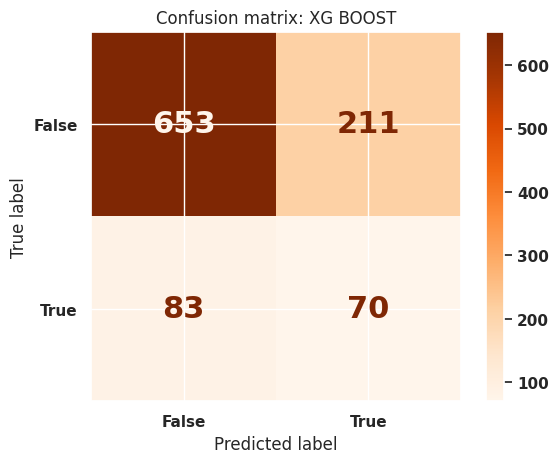

In [143]:
# Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG BOOST')
plt.show()

**False negatives obtained after using XG Boost: 83**

# **10. Results:**

In [155]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_train_recall*100,lr_test_recall*100])
test.add_row(['3','Naive Bayes',nb_train_recall*100,nb_test_recall*100])
test.add_row(['4','Decision Tree',dt_train_recall*100,dt_test_recall*100])
test.add_row(['5','Support Vector Machines',svm_train_recall*100,svm_test_recall*100])
test.add_row(['6','Random Forests',rf_train_recall*100,rf_test_recall*100])
test.add_row(['7','XG Boost',xgb_train_recall*100,xgb_test_recall*100])
print(test)

+---------+-------------------------+-------------------+--------------------+
| Sl. No. |   Classification Model  |  Train Recall (%) |  Test Recall (%)   |
+---------+-------------------------+-------------------+--------------------+
|    1    |   Logistic Regression   | 68.53598014888338 | 62.745098039215684 |
|    3    |       Naive Bayes       | 63.47394540942928 | 58.16993464052288  |
|    4    |      Decision Tree      | 82.77915632754342 | 82.35294117647058  |
|    5    | Support Vector Machines | 73.64764267990076 | 58.16993464052288  |
|    6    |      Random Forests     | 65.16129032258064 | 60.78431372549019  |
|    7    |         XG Boost        | 81.09181141439205 | 45.751633986928105 |
+---------+-------------------------+-------------------+--------------------+


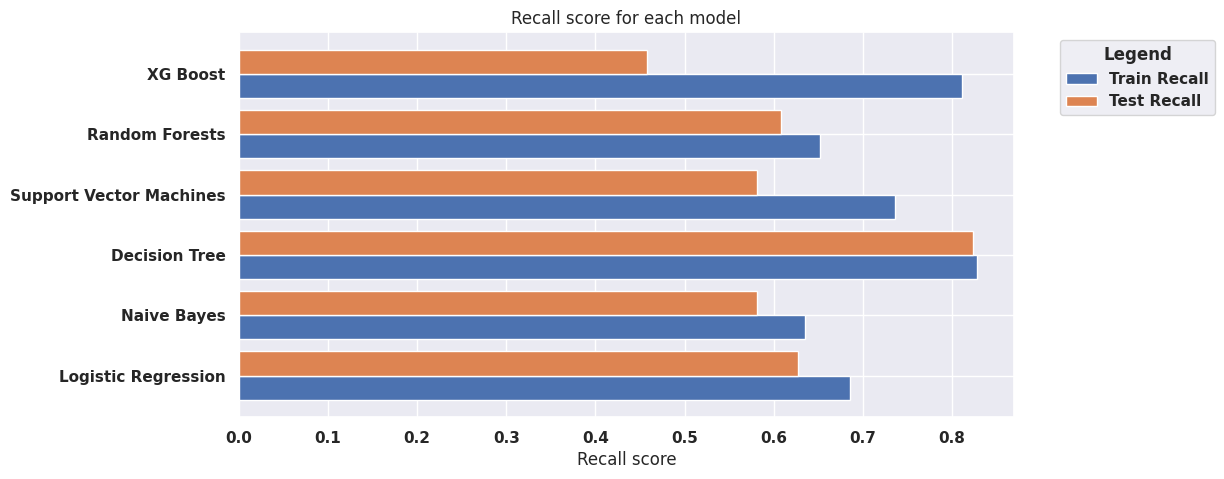

In [156]:
# Plotting Recall scores

ML_models = ['Logistic Regression','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,rf_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,rf_test_recall,xgb_test_recall]

X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')

plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

* **The decision tree has the highest train and test recall score compared to other models built.**

# **11. Summary and Conclusions:**

* We trained 6 Machine Learning models using the training dataset, and hyperparameter tuning was used in some models to improve the model performance.
* To build the models, missing values were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.
* Recall was chosen as the model evaluation metric because it was very important that we reduce the false negatives.
* Initial set of predictions were obtained using the baseline model, ie, logistic regression model, and other commonly used classification models were also build in search of better predictions.

* Predicting the risk of coronary heart disease is critical for reducing fatalities caused by this illness. We can avert deaths by taking the required medications and precautions if we can foresee the danger of this sickness ahead of time.
* It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.
* We were able to create a model with a recall of just 0.82 because of limitated data available and limited computational power availabe.
* A recall score of 0.82 indicates that out of 100 individuals with the illness, our model will be able to classify only 82 as high risk patients, while the remaining 18 will be misclassified.
* Future developments must include a strategy to improve the model recall score, enabling us to save even more lives from this disease. This includes involving more people in the study, and include people with different medical history, etc build an application with better recall score.

* From our analysis, it is also found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure, prevalent hypertension and total cholesterol.
* Diabetes, prevalent stroke and BP medication were the least important features in determining the risk of CHD.

# **12. References:**

* GeekforGeeks
* Towards data science
* Analytics Vidhya
* ProjectPro
* Kaggle
* W3 school
* Pythonguides
* Stackoverflow
* Python libraries technical documentation
* Krish Naik on Youtube
* Codebasics on Youtube
* 3blue1brown on Youtube